In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Creamos una copia del dataset para comenzar a trabajar.

In [2]:
ds_hotel=pd.read_csv('./hotels_train.csv')
ds_trabajo = ds_hotel.copy()

Visualizamos la cantidad de columnas y filas.

In [3]:
ds_trabajo.shape

(61913, 32)

In [4]:
ds_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [5]:
ds_trabajo.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,NaN,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,NaN,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,NaN,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,9.0,NaN,0,Transient,143.29,0,0,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Consultamos la cantidad de celdas nulas. Para ello separamos las columnas del ds en dos mitades para poder observarlas.

In [6]:
ds_trabajo.iloc[:, :16].isna().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       4
babies                         0
meal                           0
country                      221
market_segment                 0
distribution_channel           0
is_repeated_guest              0
dtype: int64

In [7]:
ds_trabajo.iloc[:, 16:].isna().sum()

previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status_date               0
id                                    0
is_canceled                           0
dtype: int64

Visualizamos el porcentaje de valores faltantes por sobre el total del dataset. Para ello dividimos el dataframe en 2 subconjuntos de columnas. 

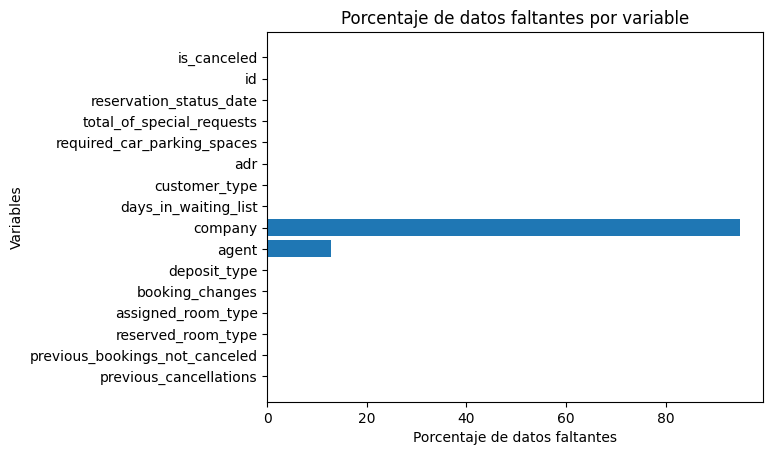

In [8]:
percent_missing_1 = ds_trabajo.iloc[:,16:].isnull().sum() * 100 / len(ds_trabajo)

plt.barh(percent_missing_1.index, percent_missing_1)
plt.xlabel('Porcentaje de datos faltantes')
plt.ylabel('Variables')
plt.title('Porcentaje de datos faltantes por variable')
plt.show()

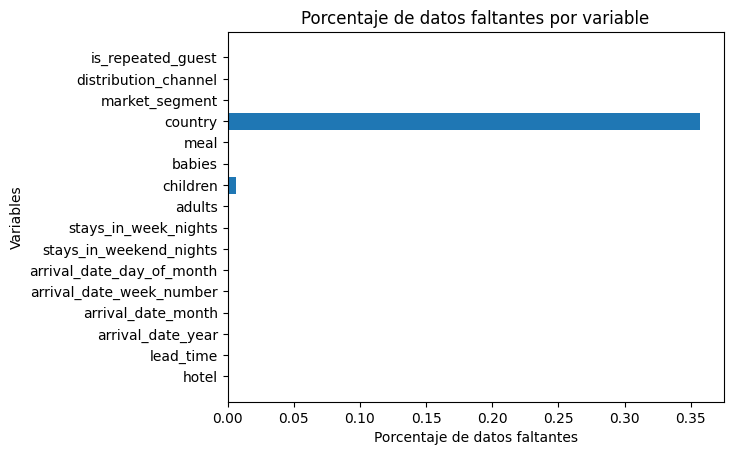

In [9]:
percent_missing_2 = ds_trabajo.iloc[:,:16].isnull().sum() * 100 / len(ds_trabajo)

plt.barh(percent_missing_2.index, percent_missing_2)
plt.xlabel('Porcentaje de datos faltantes')
plt.ylabel('Variables')
plt.title('Porcentaje de datos faltantes por variable')
plt.show()

Podemos observar que las columnas `agent`, `country` y `company` tienen datos nulos.
En particular `company` tiene casi el 95% de sus celdas nulas. Creemos que siendo tantos valores nulos no tiene sentido imputarlos, por lo tanto vamos a eliminar esta columna.

In [10]:
ds_trabajo = ds_trabajo.drop('company', axis=1)

En cuanto a `agent` y `country`, el porcentaje de nulos es mucho menor (cerca del 13% para `agent` y cerca del 0.35% para `country`). En estos dos casos, vamos a optar por hacer un análisis más profundo de cada una (a medida que avance el análisis general del caso) para decidir qué hacer con ellas.
Por último observamos que `children` tiene sólo el 0.0064% de valores nulos. En este caso la imputaremos. 

Listamos las columnas y podemos observar que aquellas relacionadas a la fecha de llegada (`arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`) pueden ser unificadas en una única columna que represente la fecha de llegada, como la concatenación de estos valores. Inclusive, con esto en cuenta, es posible obviar la columna `arrival_date_number_of_week`, ya que puede ser calculada a partir de esta nueva columna.
Unificamos entonces las tres columnas relacionadas a la fecha de llegada en una única columna

In [11]:
import calendar
ds_trabajo['arrival_date_month'] = ds_trabajo['arrival_date_month'].apply(lambda x: list(calendar.month_name).index(x))
ds_trabajo['arrival_date'] = pd.to_datetime(ds_trabajo['arrival_date_year'].astype(str) + '-' + ds_trabajo['arrival_date_month'].astype(str) + '-' + ds_trabajo['arrival_date_day_of_month'].astype(str)) 
ds_trabajo['arrival_date']

0       2016-09-05
1       2015-10-31
2       2016-10-13
3       2016-12-12
4       2017-03-19
           ...    
61908   2017-01-27
61909   2016-09-02
61910   2017-05-08
61911   2015-10-10
61912   2016-04-17
Name: arrival_date, Length: 61913, dtype: datetime64[ns]

Borramos las tres columnas que quedaron unificadas

In [12]:
ds_trabajo = ds_trabajo.drop('arrival_date_year', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_month', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_day_of_month', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_week_number', axis=1)

ds_trabajo.columns


Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'arrival_date'],
      dtype='object')

In [13]:
ds_trabajo.iloc[:, :16].dtypes

hotel                              object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
dtype: object

En primer lugar, vimos que el paper indica que la variable `lead_time` está especificada en días. Creemos que trabajarlo en meses facilitará la interpretación de los datos, por este motivo vamos trabajarla en esta unidad. 

In [14]:
ds_trabajo['lead_time'] = ds_trabajo['lead_time'] / 30

Pasamos la variable `children` a `int64`, porque se trata de una cantidad entera, no tiene sentido representar un niño en formato flotante. Por otro lado, vimos que esta variable tiene sólo 4 valores nulos, por lo tanto nos parece correcto imputarlos reeplazandolos por 0. A continuación veremos que prácticamente no hay diferencia en la distribución antes y después de imputar estos 4 valores.

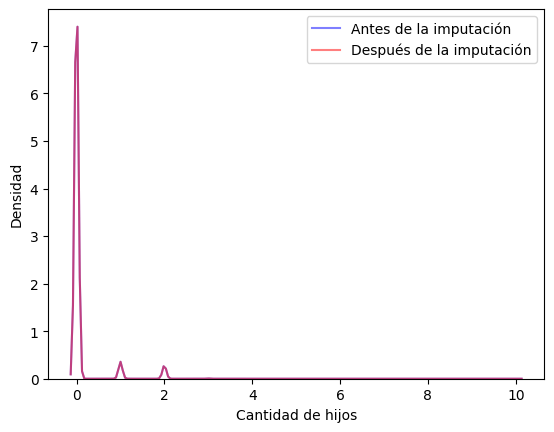

In [15]:
# Gráfico de densidad antes de imputar los valores nulos
sns.kdeplot(ds_trabajo['children'], label='Antes de la imputación', alpha=0.5, color="blue")

# Imputar los valores nulos en "children" y crear un nuevo DataFrame
ds_trabajo_imputed = ds_trabajo.fillna(0)

# Gráfico de densidad después de imputar los valores nulos
sns.kdeplot(ds_trabajo_imputed['children'], label='Después de la imputación', alpha=0.5, color="red")

# Configurar el gráfico
plt.xlabel('Cantidad de hijos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [16]:
ds_trabajo['children'] = ds_trabajo['children'].fillna(0).astype(np.int64)
ds_trabajo['children'].dtype

dtype('int64')

In [17]:
ds_trabajo.iloc[:, 16:].dtypes

booking_changes                         int64
deposit_type                           object
agent                                 float64
days_in_waiting_list                    int64
customer_type                          object
adr                                   float64
required_car_parking_spaces             int64
total_of_special_requests               int64
reservation_status_date                object
id                                     object
is_canceled                             int64
arrival_date                   datetime64[ns]
dtype: object

Vamos a castear `agent` a `object`, no tiene sentido manejarla como `float` ya que el mismo paper la trata como un id categórico. Por el momento, conservamos los valores nulos para luego analizar cómo los imputamos.

In [18]:
ds_trabajo['agent'] = pd.to_numeric(ds_trabajo['agent'], errors='coerce').astype('Int64')
ds_trabajo['agent'] = ds_trabajo['agent'].astype('object')
ds_trabajo['agent'].dtype

dtype('O')

Vamos a trabajar las fechas con el tipo `datetime64[ns]`. Esto es porque nos interesa manejarlas como variables cuantitativas para poder ser ordenadas y matemáticamente manipuladas para calcular intervalos de tiempo, por ejemplo.

In [19]:
ds_trabajo['reservation_status_date'] = pd.to_datetime(ds_trabajo['reservation_status_date'])
ds_trabajo['reservation_status_date'].dtype

dtype('<M8[ns]')

Por otro lado, vamos a pasar todas aquellas variables categóricas booleanas a tipo `object`. Esto es porque se trata de una variable cualitativa la cual tiene como posibles valores `0` y `1`.

In [20]:
ds_trabajo['is_canceled'] = ds_trabajo['is_canceled'].astype('object')
ds_trabajo['is_repeated_guest'] = ds_trabajo['is_repeated_guest'].astype('object')


Por último, vamos a eliminar la columna `id` ya que no nos aporta ningún valor en nuestro problema.

In [21]:
ds_trabajo = ds_trabajo.drop('id', axis=1)

Calculamos las medidas de resumen para aquellas variables cuantitativas

In [22]:
ds_trabajo.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913,61913
mean,3.741606,0.924135,2.510054,1.862791,0.104889,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703,2016-07-18 03:11:41.765380352,2016-08-28 10:26:23.783696384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.766667,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-01-19 00:00:00,2016-03-14 00:00:00
50%,2.600000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-07-24 00:00:00,2016-09-08 00:00:00
75%,5.733333,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-01-28 00:00:00,2017-03-20 00:00:00
max,20.966667,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,3.690598,0.993101,1.884926,0.589066,0.402835,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412,NaN,NaN


Vemos la frecuencia de cada variable cualitativa. Vamos a hacer el proceso separando las columnas en 5 subsets debido a la cantidad de columnas y de categorías distintas para cada una.

In [23]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, :3]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()


Frecuencia de valores en hotel:
hotel
City Hotel      42129
Resort Hotel    19784
Name: count, dtype: int64

Frecuencia de valores en meal:
meal
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: count, dtype: int64

Frecuencia de valores en country:
country
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: count, Length: 149, dtype: int64



Observación: parece haber varias categorías de `country` con frecuencias bajas. Pienso en que se puede definir un cierto umbral que nos parezca de frecuencia baja y englobar aquellas categorías que estén por debajo del umbral en única frecuencia `other`. Por ejemplo, si definimos el umbral de 25, cubre 574 filas:

In [24]:
freq_countries = ds_trabajo['country'].value_counts()
freq_countries_low = freq_countries[freq_countries < 215]
print("Cantidad total de registros que tienen una frecuencia menor a 25 en la columna 'country':", sum(freq_countries_low))
freq_countries_low

Cantidad total de registros que tienen una frecuencia menor a 25 en la columna 'country': 2966


country
AGO    200
DNK    197
FIN    191
LUX    150
MAR    135
      ... 
HND      1
FJI      1
LIE      1
ATA      1
RWA      1
Name: count, Length: 127, dtype: int64

Vamos a considerar que aquellas categorías que cubran menos del 5% del total de registros pueden ser englobadas en una categoría particular que nombraremos `others`. De esta forma, estamos reduciendo nuestra cantidad de categorías de las variable `country` de 149 a 23. 

In [25]:
ds_trabajo['country'] = ds_trabajo['country'].replace(freq_countries_low.index, 'others')
ds_trabajo['country'].value_counts()

country
PRT       27950
GBR        5733
FRA        4809
ESP        4210
DEU        3312
others     2966
ITA        1911
IRL        1617
BRA        1152
BEL        1124
USA        1021
NLD         982
CHE         847
CN          597
AUT         581
CHN         545
SWE         481
POL         430
RUS         337
ISR         322
NOR         302
ROU         246
AUS         217
Name: count, dtype: int64

In [26]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 3:5]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en market_segment:
market_segment
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: count, dtype: int64

Frecuencia de valores en distribution_channel:
distribution_channel
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: count, dtype: int64



In [27]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 5:7]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en is_repeated_guest:
is_repeated_guest
0    60180
1     1733
Name: count, dtype: int64

Frecuencia de valores en reserved_room_type:
reserved_room_type
A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: count, dtype: int64



In [28]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 7:9]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en assigned_room_type:
assigned_room_type
A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: count, dtype: int64

Frecuencia de valores en deposit_type:
deposit_type
No Deposit    51685
Non Refund    10150
Refundable       78
Name: count, dtype: int64



In [29]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 9:12]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en agent:
agent
9      17004
240     7386
1       4424
14      1700
6       1639
       ...  
420        1
352        1
450        1
283        1
25         1
Name: count, Length: 296, dtype: int64

Frecuencia de valores en customer_type:
customer_type
Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: count, dtype: int64

Frecuencia de valores en is_canceled:
is_canceled
0    30972
1    30941
Name: count, dtype: int64



In [30]:
ds_trabajo['agent'].isna().sum()

7890

Para las demás variables categóricas, creemos que tienen una cantidad manejable de categorías, por lo que no valdría la pena hacer el mismo procedimiento que hicimos con `country`.

Consideramos que no tiene mayor importancia si el huésped es bebé, niño o adulto, más bien importa la cantidad en total de huéspedes para una reserva. Esto es, no creemos que sea relevante diferenciar el huésped, pensamos unificar las columnas `adults`, `children` y `babies` en una única columna `total_guests` que sea la suma de estas tres.

Por otro lado, viendo el barplot de la variable `required_car_parking_spaces` tiene su gran mayoría de datos en cantidad 0, por lo tanto creemos que no tiene relevancia en el análisis. 

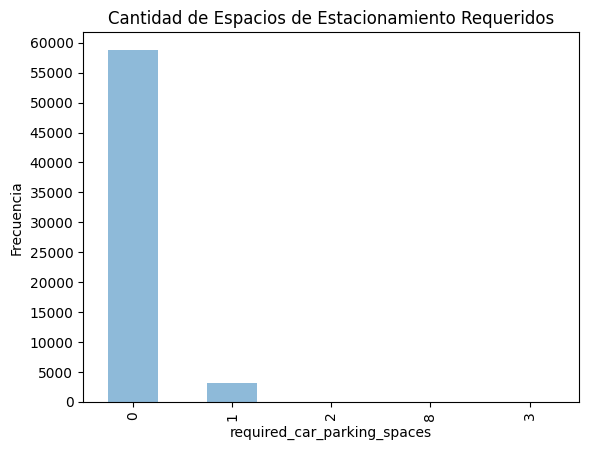

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ds_trabajo['required_car_parking_spaces'].value_counts().plot.bar(alpha=0.5, ax=ax)
ax.set_title("Cantidad de Espacios de Estacionamiento Requeridos")
ax.set_xlabel("required_car_parking_spaces")
ax.set_ylabel("Frecuencia")
ax.set_yticks(range(0, 61913, 5000))
plt.show()

Concluimos entonces que esta columna no aporta para el análisis por dicho motivo.

In [32]:
ds_trabajo = ds_trabajo.drop('required_car_parking_spaces', axis=1)

Por otro lado, vemos que `agent` tiene una importante cantidad de categorías y también parece tener una cantidad frecuencias bajas que podríamos unificar en una única categoría de `other`. También habíamos visto anteriormente que presentaba una cierta cantidad de nulos, vemos que representa casi un 13%. Dado que nos parece que `agent` es una columna relevante para la predicción de la variable `is_canceled`, no queremos descartarla. Vamos a analizarla en profundidad para ver qué decisión tomar. Creemos también que `agent` puede tener una relación con las variables `market_segment` y `distribution_channel`.

Vamos a analizar la correlación de las variables `agent`, `market_segment`, `distribution_channel`. Queremos ver si la nulidad de `agent` tiene relación con el canal de distribución y la segmentación de mercado. Esto es, si se corresponde que los registros con `agent` nulo impliquen que el valor de `market_segment` o el de `distribution_channel` no sea `TA/TO`, que son los posibles valores que ameritan que no sea nulo.

 Primero analizamos esto a partir del heatmap de `agent` contra `market_segment`. Lo que podemos ver en el gráfico es que las categorías de `Online TA` y `Offline TA/TO` concentran los colores más cálidos para cuando `agent` no es nulo.

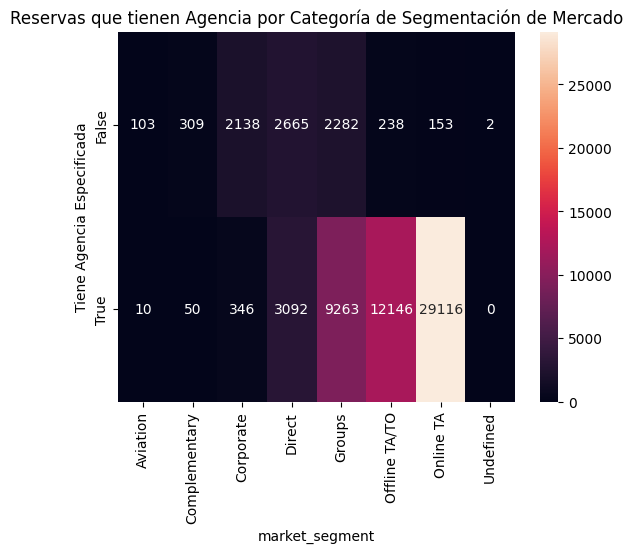

In [33]:
crosstab_agent_segment = pd.crosstab(~ds_trabajo['agent'].isna(), ds_trabajo['market_segment'])
heatmap = sns.heatmap(crosstab_agent_segment,annot=True,fmt='g')
heatmap.set_title("Reservas que tienen Agencia por Categoría de Segmentación de Mercado")
heatmap.set_ylabel("Tiene Agencia Especificada")
plt.show()

Por otro lado, vemos algo similar en el heatmap de `agent` contra `distribution_channel`. Vemos que el color más cálido está si la agencia no es nula y si la categoría es `TA/TO`.

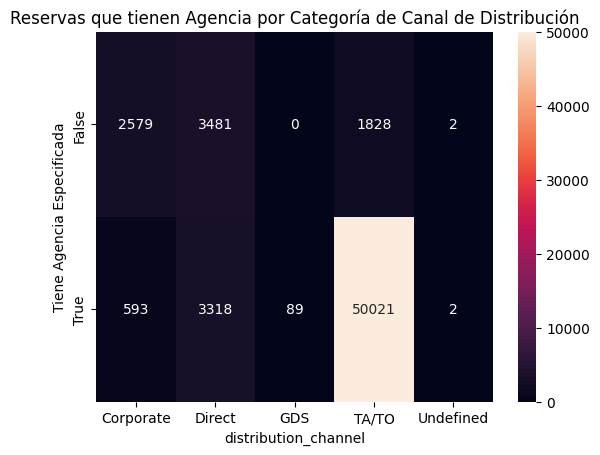

In [34]:
crosstab_agent_distribution = pd.crosstab(~ds_trabajo['agent'].isna(), ds_trabajo['distribution_channel'])
heatmap = sns.heatmap(crosstab_agent_distribution,annot=True,fmt='g')
heatmap.set_title("Reservas que tienen Agencia por Categoría de Canal de Distribución")
heatmap.set_ylabel("Tiene Agencia Especificada")
plt.show()

Podemos concluir entonces que si el canal de distribución o el segmento de mercado está relacionado a una categoría del estilo `TA/TO`, `agent` es no nulo. Además, la columna `agent` tiene una importante cantidad de categorías y creemos que reducirla a un booleano nos facilitará el análisis. Por estos dos motivos, decidimos modificar la columna `agent` para que sea booleana e indique si se especificó `agent` o no. 

In [35]:
# Crear una nueva columna que indique si se especificó un agente o no
ds_trabajo['agent_specified'] = ds_trabajo['agent'].notnull().astype(int).astype(object)

De esta manera tenemos una visualización más clara de la importancia del campo `agent`para nuestro caso.

In [36]:
# Eliminar la columna original 'agent'
ds_trabajo.drop(columns=['agent'], inplace=True)

Pensamos que dadas las opciones de la columna `meal`, podría ser un factor poco y nada relevante para una posible cancelación. Esto es porque en primer lugar parece que los hoteles ofrecen todas las opciones de comida, según el momento del día. Pero no es suficiente, creemos que hay factores relacionados a la comida que podrían ser más interesantes de conocer, como pueden ser las opciones gastronómicas o el precio de cada categoría. Por este motivo en principio pensamos en descartarla, no sin antes hacer un análisis de la distribución de cada categoría. Para esto vamos a analizar su distribución en un pie plot. 

        meal  frecuencia  percentage
0         BB       47837        77.2
1         HB        7452        12.0
2         SC        5556         9.0
3  Undefined         591         1.0
4         FB         477         0.8


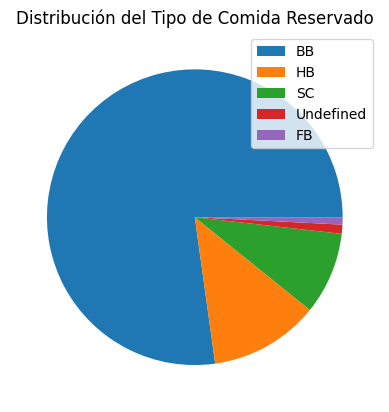

In [37]:
# Calcular la frecuencia de la variable 'meal'
frecuencia = ds_trabajo['meal'].value_counts()

# Crear un nuevo DataFrame con los valores y frecuencias
df_meal = pd.DataFrame({'meal': frecuencia.index, 'frecuencia': frecuencia.values})

# calcular los porcentajes
df_meal['percentage'] = round(df_meal['frecuencia'] / df_meal['frecuencia'].sum() * 100, 1)

# redondear los porcentajes para que sumen 100%
diff = 100 - df_meal['percentage'].sum()
df_meal.loc[0, 'percentage'] += diff

# imprimir el dataframe
print(df_meal)

# crear gráfico de torta
plt.pie(df_meal['percentage'], autopct="")
plt.title("Distribución del Tipo de Comida Reservado")
plt.legend(labels=df_meal['meal'])
plt.show()


Podemos ver claramente que la mayoría de los registros se concentran en la categoría `BB`. Las demás categorías presentan porcentajes muy bajos en comparación.
Ahora nos interesa conocer la distribución de estos valores con respecto al target (`is_canceled`). Para esto vamos a usar un stacked bar plot.

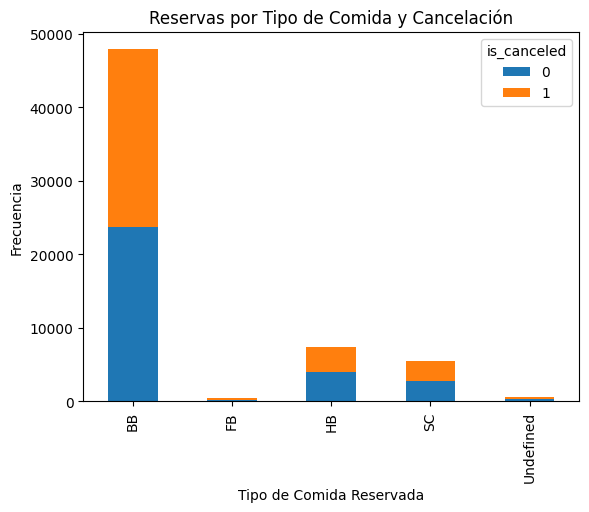

In [38]:
table = pd.crosstab(ds_trabajo['meal'], ds_trabajo['is_canceled'])

stacked_plot = table.plot(kind="bar", stacked=True)

stacked_plot.set_xlabel("Tipo de Comida Reservada")
stacked_plot.set_ylabel("Frecuencia")
stacked_plot.set_title("Reservas por Tipo de Comida y Cancelación")

plt.show()

Observamos en el gráfico que la distribución de cada categoría de `meal` es similar para cada valor de `is_canceled`. Por lo tanto, con todo lo mencionado anteriormente concluímos que la variable `meal` no es relevante para el análisis y será descartada.

In [39]:
ds_trabajo = ds_trabajo.drop('meal', axis=1)

Ahora nos interesa analizar las columnas `adults`, `children` y `babies`. Creemos que existe la posibilidad de combinarlas en una única columna y así tener la cantidad total de huéspedes, en vez de distinguirlas. Con este enfoque, vamos a crear una columna nueva `total_guests` que tiene la suma de estas tres columnas y vamos a analizar las medidas de resumen y correlaciones entre ellas y observar si la nueva columna tiene una relación similar a nuestra variable objetivo `is_canceled` que las originales individualmente. 

En primer lugar, creamos la columna `total_guests` y como primer análisis vamos a calcular las medidas de resumen de las cuatro columnas involucradas.

In [40]:
ds_trabajo['total_guests'] = ds_trabajo['babies'] + ds_trabajo['children'] + ds_trabajo['adults']

print(ds_trabajo[['babies', 'children', 'adults', 'total_guests']].describe())


             babies      children        adults  total_guests
count  61913.000000  61913.000000  61913.000000  61913.000000
mean       0.007155      0.104889      1.862791      1.974836
std        0.092158      0.402835      0.589066      0.731700
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      2.000000      2.000000
50%        0.000000      0.000000      2.000000      2.000000
75%        0.000000      0.000000      2.000000      2.000000
max        9.000000     10.000000     55.000000     55.000000


Las medidas de resumen indican que hay una cierta variabilidad en los datos de las diferentes columnas, vemos que las variables 'adults', 'children' y 'babies', no tienen distribuciones uniformes y que las medias están cercanas entre sí. Por otro lado, vemos que las estadísticas de `total_guests` son similares a la suma de las tres columnas.

Además, la creación de la variable 'total_guests' también nos permite tener una variable numérica que representa de manera más sencilla la cantidad total de huéspedes en una reserva, lo que podría ser útil para el análisis y la modelización posterior.

Por otro lado, observamos que la distribución de `babies`, `children`, `adults` y `total_guests` son similares entre sí.

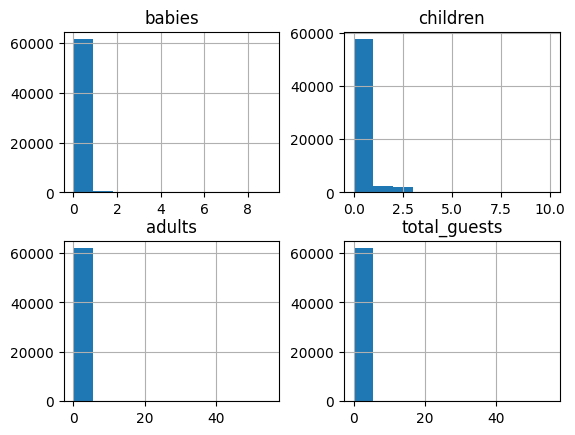

In [41]:
ds_trabajo[['babies', 'children', 'adults', 'total_guests']].hist(bins=10)
plt.show()

Por último vamos a analizar la frecuencia de cada una de estas cuatro columnas por separado contra la variable target `is_canceled`, a través de un bar plot. 

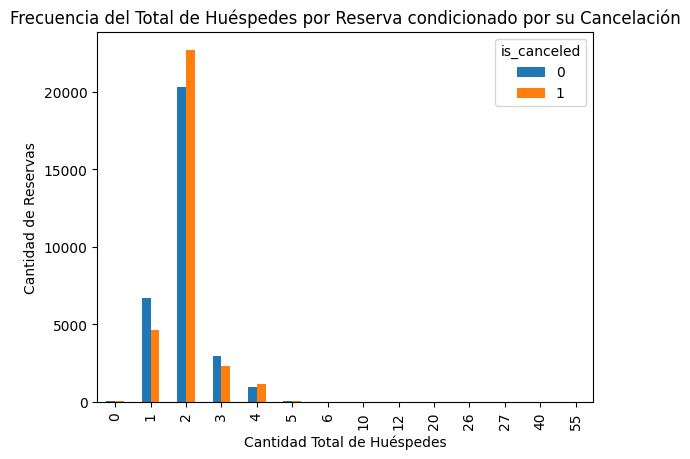

In [42]:
total_guests_cancelled = ds_trabajo.groupby(['total_guests', 'is_canceled']).size().unstack()

total_guests_cancelled.plot.bar()
plt.title('Frecuencia del Total de Huéspedes por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad Total de Huéspedes')
plt.ylabel('Cantidad de Reservas')
plt.show()

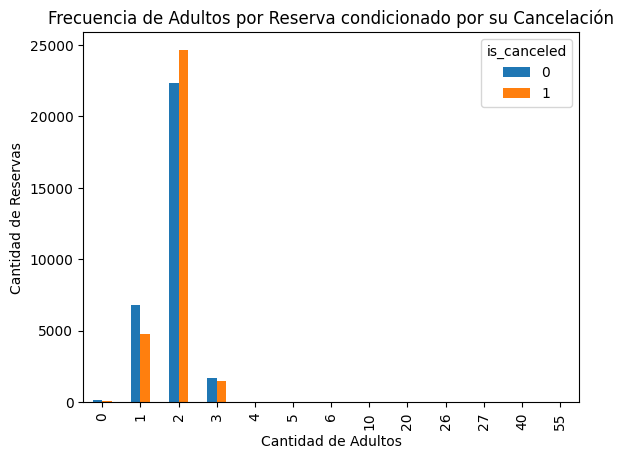

In [43]:
adults_cancelled = ds_trabajo.groupby(['adults', 'is_canceled']).size().unstack()

adults_cancelled.plot.bar()
plt.title('Frecuencia de Adultos por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Adultos')
plt.ylabel('Cantidad de Reservas')
plt.show()

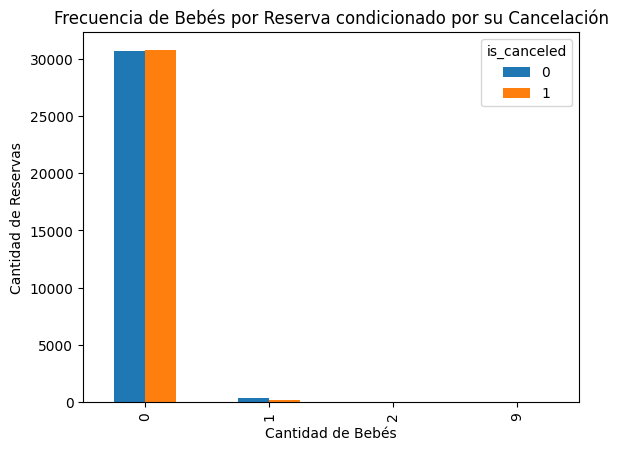

In [44]:
babies_cancelled = ds_trabajo.groupby(['babies', 'is_canceled']).size().unstack()

babies_cancelled.plot.bar()
plt.title('Frecuencia de Bebés por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Bebés')
plt.ylabel('Cantidad de Reservas')
plt.show()

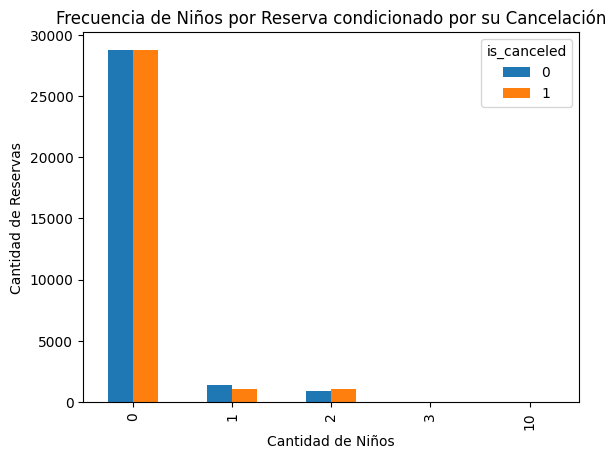

In [45]:
children_cancelled = ds_trabajo.groupby(['children', 'is_canceled']).size().unstack()

children_cancelled.plot.bar()
plt.title('Frecuencia de Niños por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Niños')
plt.ylabel('Cantidad de Reservas')
plt.show()

Podemos ver que tanto `total_guests` como `adults` tienen una distribución muy similar con respecto a la variable `is_canceled`. Por otro lado, `babies` y `children` contra `is_canceled` también son similares, y adicionalmente notamos en estos gráficos que existen más reservas sin bebés ni niños, lo cual refuerza el hecho de que los gráficos de la cantidad de adultos y la cantidad total de huéspedes sean parecidos.

Por estos motivos, vamos a unificar las columnas `adults`, `children` y `babies` en una única columna `total_guests`. Eliminamos las tres columnas en cuestión.

In [46]:
ds_trabajo = ds_trabajo.drop('adults', axis=1)
ds_trabajo = ds_trabajo.drop('children', axis=1)
ds_trabajo = ds_trabajo.drop('babies', axis=1)


In [47]:
ds_trabajo.columns.to_list()

['hotel',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'total_of_special_requests',
 'reservation_status_date',
 'is_canceled',
 'arrival_date',
 'agent_specified',
 'total_guests']

El siguiente punto es analizar gráficamente la distribución de nuestras variables y también la relación de cada una con el target `is_canceled`.

Para `hotel`, vemos en un gráfico de torta que hay un mayor porcentaje de reservas para la categoría `City Hotel` que para `Resort Hotel`.

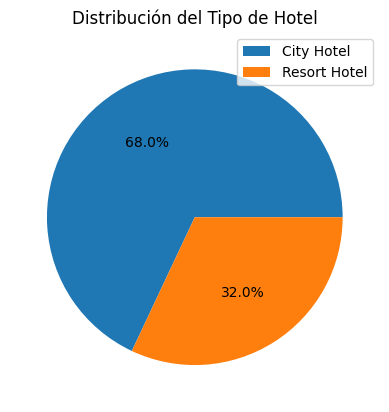

In [48]:
frecuencia = ds_trabajo['hotel'].value_counts()

df_hotel = pd.DataFrame({'hotel': frecuencia.index, 'frecuencia': frecuencia.values})

df_hotel['percentage'] = round(df_hotel['frecuencia'] / df_hotel['frecuencia'].sum() * 100, 1)

diff = 100 - df_hotel['percentage'].sum()
df_hotel.loc[0, 'percentage'] += diff

plt.pie(df_hotel['percentage'], autopct="%1.1f%%")
plt.title("Distribución del Tipo de Hotel")
plt.legend(labels=df_hotel['hotel'])
plt.show()

Por otro lado, observamos en un barplot que se cancelan más reservas para `City Hotel` que para `Resort Hotel`. 

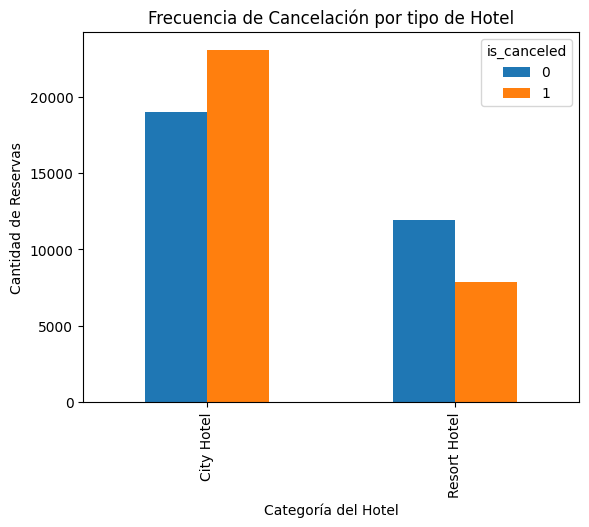

In [49]:
hotels_cancelled = ds_trabajo.groupby(['hotel', 'is_canceled']).size().unstack()

hotels_cancelled.plot.bar()
plt.title('Frecuencia de Cancelación por tipo de Hotel')
plt.xlabel('Categoría del Hotel')
plt.ylabel('Cantidad de Reservas')
plt.show()

Para la variable `lead_time`, elegimos analizar su boxplot.
Viendo su rango intercuartílico, sabemos que la mayoría de las reservas se hacen con entre 1 y 6 meses de antelación. Por otro lado, vemos que el mínimo está en 0 meses y el máximo (sin ser outlier) cerca de los 14 meses. Por último, vemos que hay varios outliers entre 14 y 21 meses.

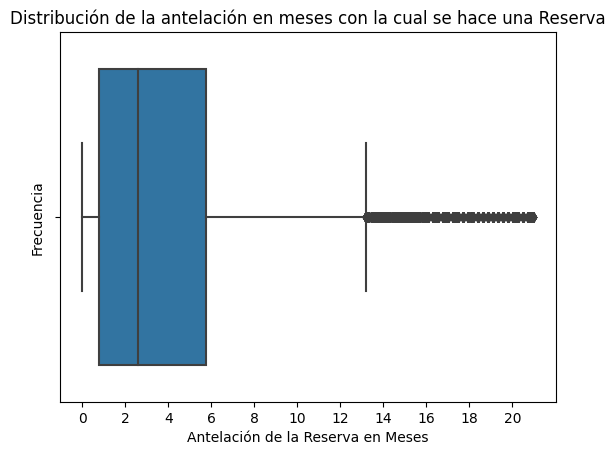

In [50]:
sns.boxplot(x=ds_trabajo["lead_time"])
plt.xticks(range(0, 22, 2))
plt.xlabel('Antelación de la Reserva en Meses')
plt.ylabel('Frecuencia')
plt.title('Distribución de la antelación en meses con la cual se hace una Reserva')
plt.show()


Analizamos su relación con `is_canceled` mediante un scatter plot. Podemos observar claramente que entre mayor sea la antelación con la cual se hizo la reserva, mayor es su probabilidad de cancelación. A partir de los 10 meses aproximadamente se ven muchas más cancelaciones.

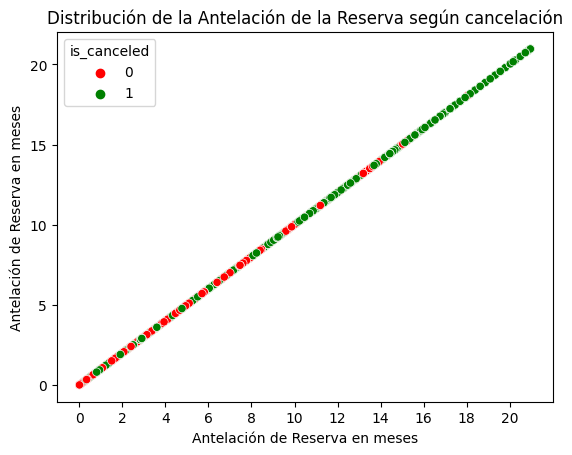

In [51]:
ds_trabajo["lead_time_months"] = ds_trabajo["lead_time"]

sns.scatterplot(data=ds_trabajo, x="lead_time_months", y="lead_time_months", hue="is_canceled", palette=["red", "green"])

plt.xticks(range(0, 22, 2))
plt.title("Distribución de la Antelación de la Reserva según cancelación")
plt.xlabel("Antelación de Reserva en meses")
plt.ylabel("Antelación de Reserva en meses")
plt.show()

Borramos esta columna auxiliar que usamos para el análisis anterior.

In [52]:
ds_trabajo = ds_trabajo.drop("lead_time_months", axis=1)

En cuanto a la columna ´stays_in_weekend_nights´, observamos que mayoritariamente no se reservan noches de fin de semana. Luego el resto de los valores se concentra entre 2 y 1 noche de fin de semana, mientras que para los demás valores son pocas las reservas registradas.

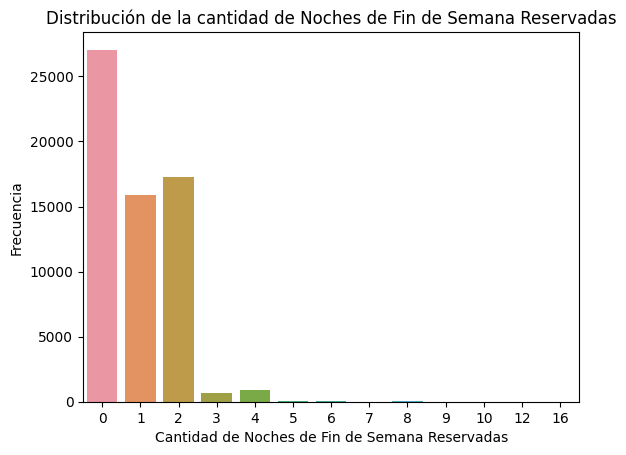

In [53]:
grafico = sns.countplot(x='stays_in_weekend_nights', data=ds_trabajo)

grafico.yaxis.set_major_locator(plt.MultipleLocator(5000))

plt.xlabel('Cantidad de Noches de Fin de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de Fin de Semana Reservadas')
plt.show()

Viendo el bar plot de `stays_in_weekend_nights` contra `is_canceled`, esta variable no parece tener un impacto significativo en la cancelación de una reserva. Esto es porque vemos un peso similar para cancelados y no cancelados en sus valores posibles, en un primer análisis no vemos una relación clara entre estas dos variables. 

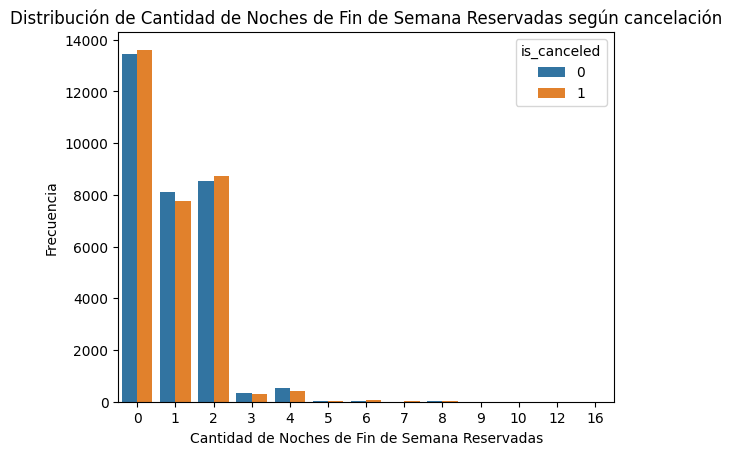

In [54]:
grafico = sns.countplot(x='stays_in_weekend_nights', hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Fin de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Fin de Semana Reservadas según cancelación")

plt.show()

Análogamente hacemos el análisis para `stays_in_week_nights`. Observamos que se reservan en su mayoría 2 noches de semana, seguido de 1 y de 3.

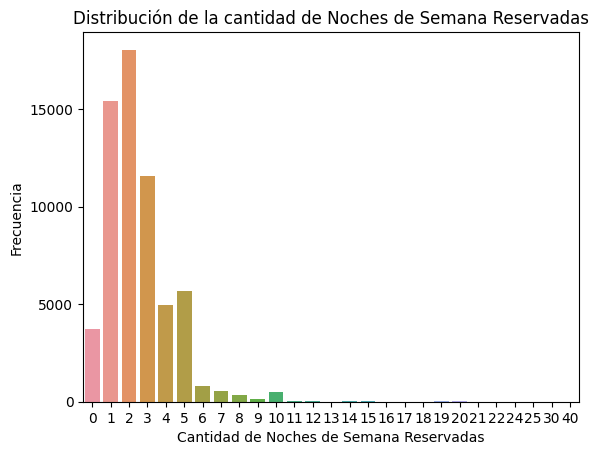

In [55]:
grafico = sns.countplot(x='stays_in_week_nights', data=ds_trabajo)

grafico.yaxis.set_major_locator(plt.MultipleLocator(5000))

plt.xlabel('Cantidad de Noches de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de Semana Reservadas')
plt.show()

Comparándolo contra nuestro target, esta vez sí notamos que hay diferencias entre cancelados y no cancelados según el valor que puede tomar la variable, principalmente para 1 y 2 días.

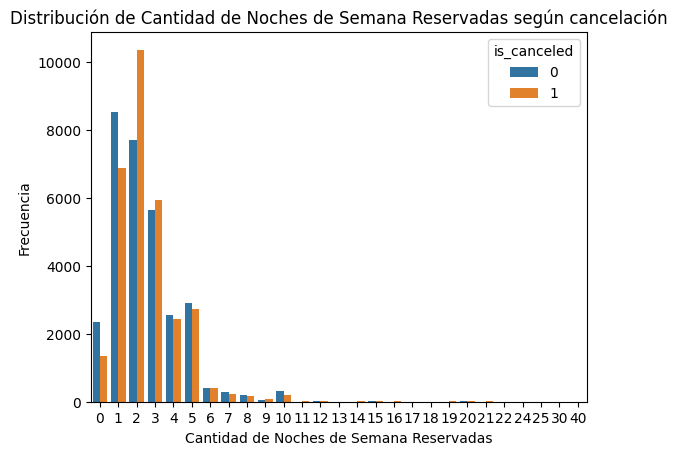

In [56]:
grafico = sns.countplot(x='stays_in_week_nights', hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Semana Reservadas según cancelación")

plt.show()

En cuanto a la variable `country`, vemos que la mayor cantidad de reservas se hacen en Portugal, para los demás países la cantidad de reservas es muy baja en comparación.

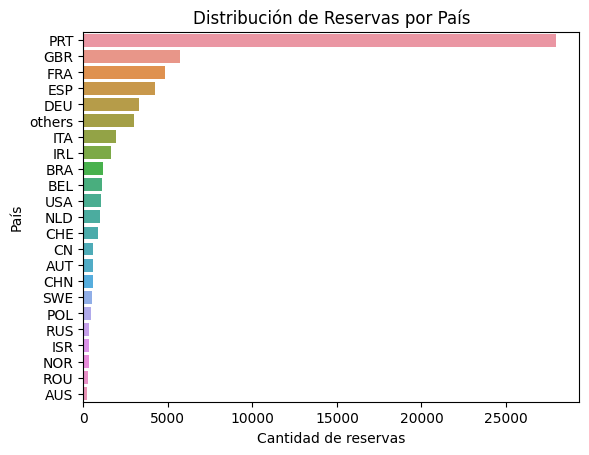

In [57]:
country_counts = ds_trabajo['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

country_counts = country_counts.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='country', data=country_counts)

plt.xlabel('Cantidad de reservas')
plt.ylabel('País')
plt.title('Distribución de Reservas por País')

plt.show()

En relación a `is_canceled` podemos ver que en Portugal hay un mayor número de cancelaciones que de no cancelaciones. En el gráfico de torta vemos claramente que más de la mitad de las reservas en ese país son canceladas. En cambio, en general para los demás países, más de la mitad de las reservas no son canceladas.

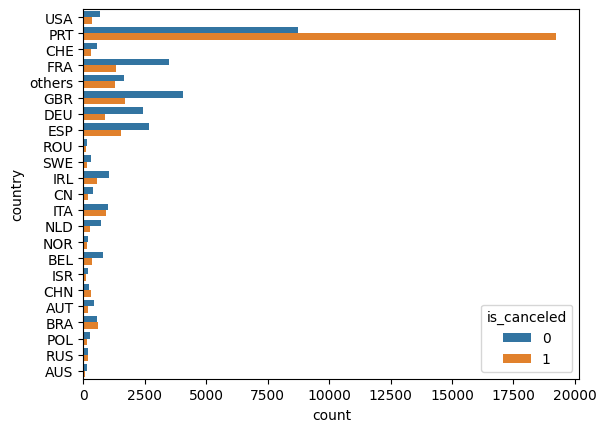

In [58]:
sns.countplot(y='country', hue='is_canceled', data=ds_trabajo)
plt.show()

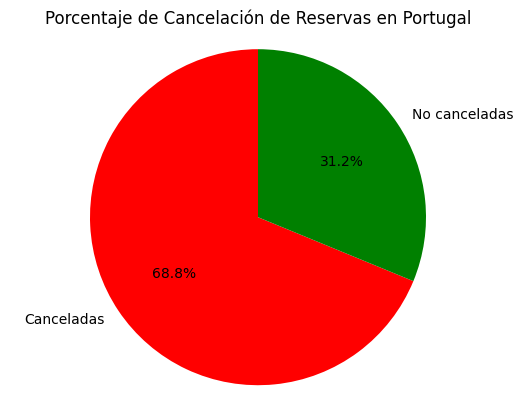

In [59]:
df_country = ds_trabajo[ds_trabajo['country'] == 'PRT']

cancel_pct = df_country['is_canceled'].mean() * 100

labels = ['Canceladas', 'No canceladas']
sizes = [cancel_pct, 100 - cancel_pct]
colors = ['red', 'green']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Porcentaje de Cancelación de Reservas en Portugal')
plt.show()

En cuanto a `is_repeated_guest`, observamos que más de 60000 reservas no fueron hechas por huéspedes repetidos.

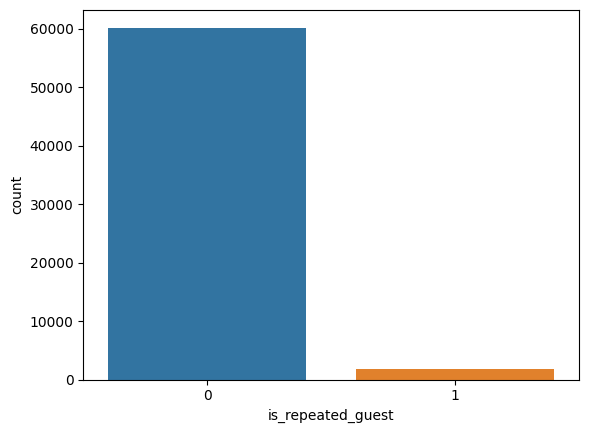

In [60]:
sns.countplot(x='is_repeated_guest', data=ds_trabajo)
plt.show()

Sin embargo, notamos que aquella minoría que ya reservó en el hotel son menos propensos a cancelar, mientras que para los nuevos huéspedes es casi equitativa la elección respecto a la cancelación.

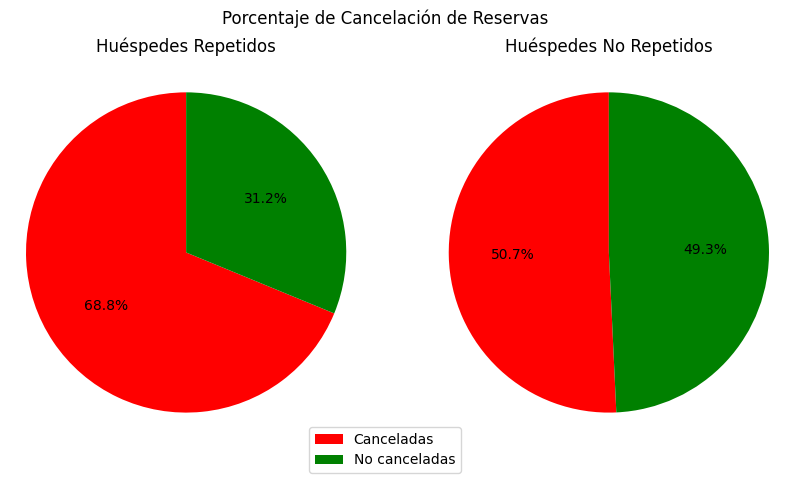

In [61]:
df_no_repeated = ds_trabajo[ds_trabajo['is_repeated_guest'] == 0]

cancel_pct_no_repeated = df_no_repeated['is_canceled'].mean() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sizes_repeated = [cancel_pct, 100 - cancel_pct]
colors_repeated = ['red', 'green']
ax1.pie(sizes_repeated,  colors=colors_repeated, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Huéspedes Repetidos')

sizes_no_repeated = [cancel_pct_no_repeated, 100 - cancel_pct_no_repeated]
colors_no_repeated = ['red', 'green']
ax2.pie(sizes_no_repeated,  colors=colors_no_repeated, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Huéspedes No Repetidos')

fig.suptitle('Porcentaje de Cancelación de Reservas')
fig.legend(labels=['Canceladas', 'No canceladas'], loc='center', bbox_to_anchor=(0.5, 0.1))

plt.show()

Para `previous_cancellations`, vemos que la gran mayoría de las reservas no fueron canceladas previamente. Sin embargo, leyendo el paper entendemos que esta variable está relacionada a `is_repeated_guest`, ya que una reserva no puede ser cancelada anteriormente si el cliente no reservó con anterioridad, y en estos casos se le setteó por defecto el valor de 0. Por este motivo, vamos a analizar la relación entre ambas variables más adelante.
Viendo los valores mayores a 0 de `previous_cancellations`, vemos que se concentran en 1.

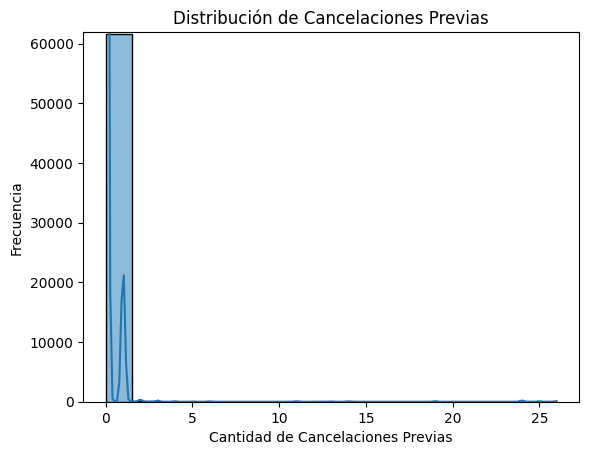

In [62]:
sns.histplot(x='previous_cancellations', data=ds_trabajo, kde=True)

plt.xlabel('Cantidad de Cancelaciones Previas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cancelaciones Previas')
plt.ylim(0, len(ds_trabajo) + 1)

plt.show()

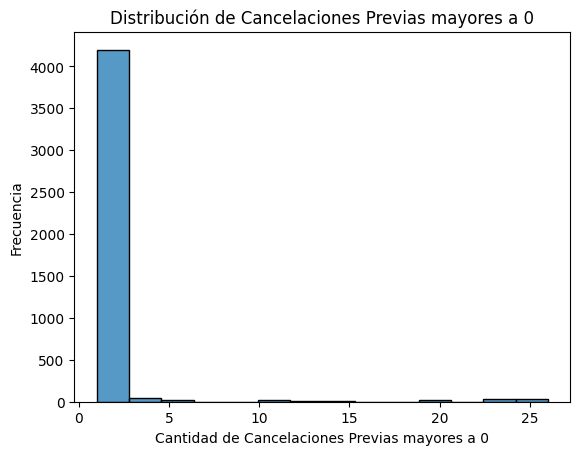

In [63]:
previous_cancellations_greater_than_zero = ds_trabajo[ds_trabajo['previous_cancellations'] > 0]
sns.histplot(x='previous_cancellations', data=previous_cancellations_greater_than_zero)

plt.xlabel('Cantidad de Cancelaciones Previas mayores a 0')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cancelaciones Previas mayores a 0')

plt.show()

En cuanto a su relación con `is_canceled` notamos en un primer gráfico que se cancelan reservas un poco menos cuando no hubo cancelaciones previas. Pero cuando ya se canceló una vez, es mucho más probable que se vuelva a cancelar.

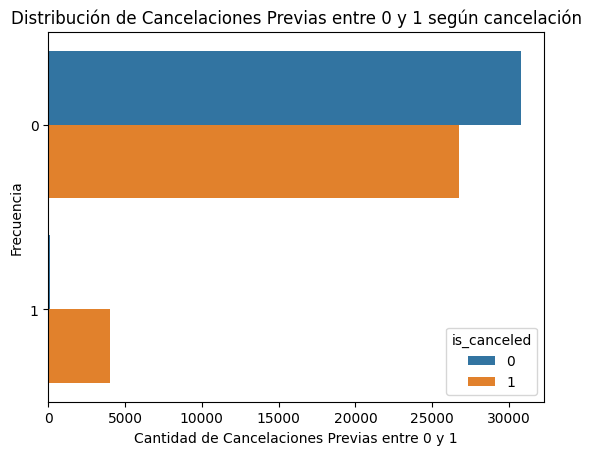

In [64]:
previous_cancellations_greater_than_one = ds_trabajo.loc[ds_trabajo['previous_cancellations'] <= 1]

sns.countplot(y='previous_cancellations', hue="is_canceled",data=previous_cancellations_greater_than_one)

plt.xlabel('Cantidad de Cancelaciones Previas entre 0 y 1')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cancelaciones Previas entre 0 y 1 según cancelación')
plt.show()

Por otro lado, vemos que cuando se canceló previamente entre 2 y 11 veces es menos común que se vuelva a cancelar.

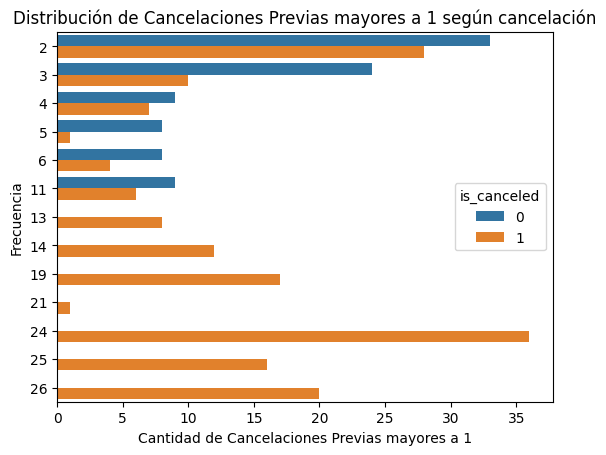

In [65]:
previous_cancellations_greater_than_one = ds_trabajo.loc[ds_trabajo['previous_cancellations'] > 1]

sns.countplot(y='previous_cancellations', hue="is_canceled",data=previous_cancellations_greater_than_one)

plt.xlabel('Cantidad de Cancelaciones Previas mayores a 1')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cancelaciones Previas mayores a 1 según cancelación')

plt.show()

Y una vez que se canceló previamente más de 13 veces, vemos que se vuelve a cancelar en todos los casos.

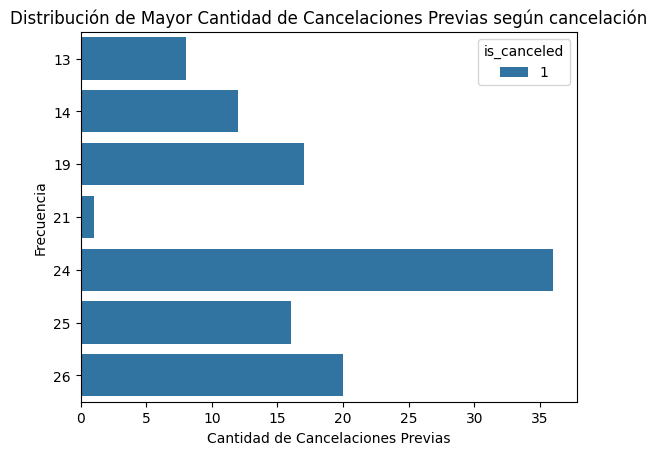

In [66]:
greater_previous_cancellations = ds_trabajo.loc[ds_trabajo['previous_cancellations'] > 12]

sns.countplot(y='previous_cancellations', hue="is_canceled",data=greater_previous_cancellations)

plt.xlabel('Cantidad de Cancelaciones Previas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Mayor Cantidad de Cancelaciones Previas según cancelación')

plt.show()

Con respecto a `previous_bookings_not_canceled`, vemos que la tendencia es que no hay reservas previas no canceladas. Creemos que puede ser un caso similar al de la variable `previous_cancellations`, nos va a interesar relacionarlo con la variable `is_repeated_guest` para entenderla en su totalidad.

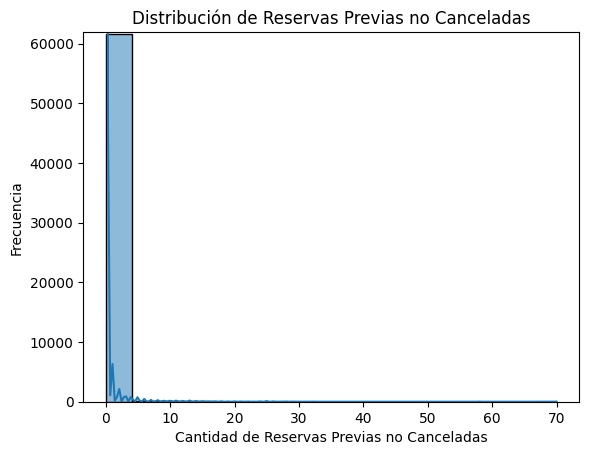

In [67]:
sns.histplot(x='previous_bookings_not_canceled', data=ds_trabajo, kde=True)

plt.xlabel('Cantidad de Reservas Previas no Canceladas')
plt.ylabel('Frecuencia')
plt.ylim(0, len(ds_trabajo) + 1)
plt.title('Distribución de Reservas Previas no Canceladas')

plt.show()

Analizando un boxplot comparandola contra `is_canceled`, se observa que no hay una diferencia significativa en la mediana entre cancelados y no cancelados, sin embargo notamos que hay más outliers cuando no se cancela. Esto puede implicar que las reservas se cancelan menos entre menos cancelaciones se hayan hecho en el pasado.

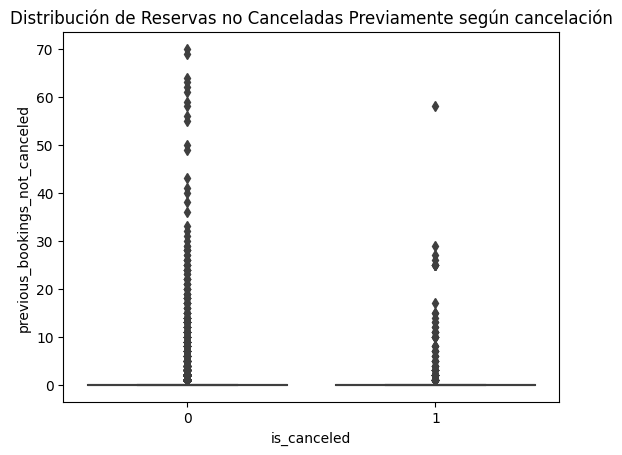

In [68]:
sns.boxplot(x='is_canceled', y='previous_bookings_not_canceled', data=ds_trabajo)
plt.title('Distribución de Reservas no Canceladas Previamente según cancelación')
plt.show()

Para la variable `distribution_channel` podemos decir que la mayoría de las reservas se hacen por agencias u operadores de turismo.

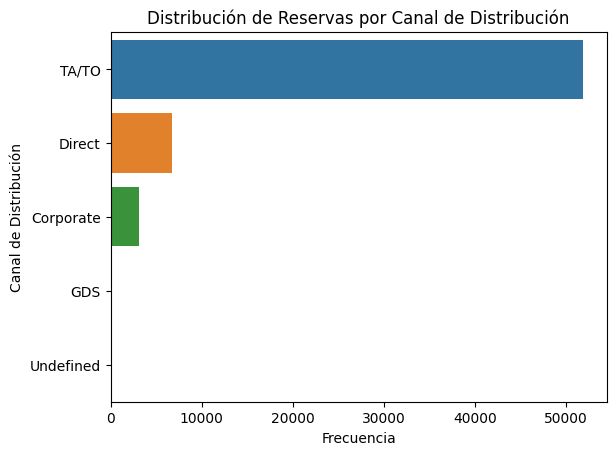

In [69]:
distribution_channel_counts = ds_trabajo['distribution_channel'].value_counts().reset_index()
distribution_channel_counts.columns = ['distribution_channel', 'count']

distribution_channel_counts = distribution_channel_counts.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='distribution_channel', data=distribution_channel_counts)

plt.xlabel('Frecuencia')
plt.ylabel('Canal de Distribución')
plt.title('Distribución de Reservas por Canal de Distribución')

plt.show()

Podemos decir también que para las agencias u operadoras hay un poco más de cancelaciones en comparación a los otros tipos de canal de distribución.

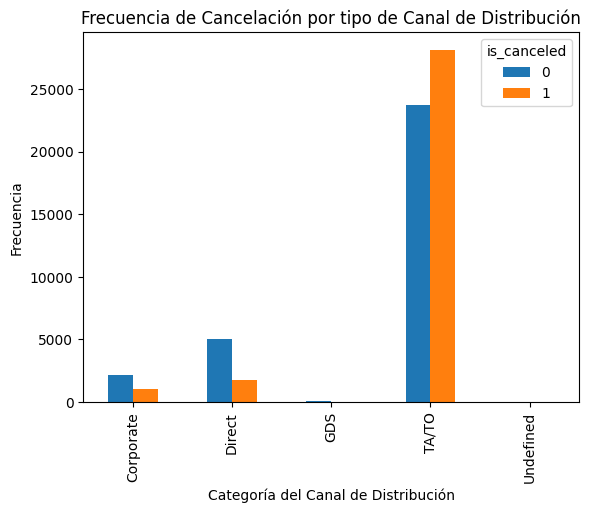

In [70]:
distribution_channels_cancelled = ds_trabajo.groupby(['distribution_channel', 'is_canceled']).size().unstack()

distribution_channels_cancelled.plot.bar()
plt.title('Frecuencia de Cancelación por tipo de Canal de Distribución')
plt.xlabel('Categoría del Canal de Distribución')
plt.ylabel('Frecuencia')
plt.show()

Algo similar observamos para `market_segment`, la mayor concentración de reservas está en agencias u operadores, analizaremos más adelante la relación entre esta variable y `distribution_channel`.

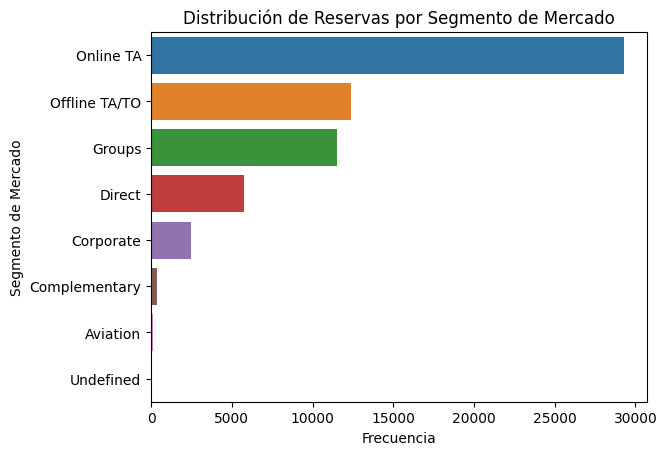

In [71]:
market_segment_counts = ds_trabajo['market_segment'].value_counts().reset_index()
market_segment_counts.columns = ['market_segment', 'count']

market_segment_counts = market_segment_counts.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='market_segment', data=market_segment_counts)

plt.xlabel('Frecuencia')
plt.ylabel('Segmento de Mercado')
plt.title('Distribución de Reservas por Segmento de Mercado')

plt.show()

A diferencia del canal de distribución, en el segmento de mercado vemos que las reservas por agencia u operadores tienen similar frecuencia de cancelaciones y no cancelaciones, mientras que en el sector `Groups` se ve una frecuencia mayor de cancelaciones.

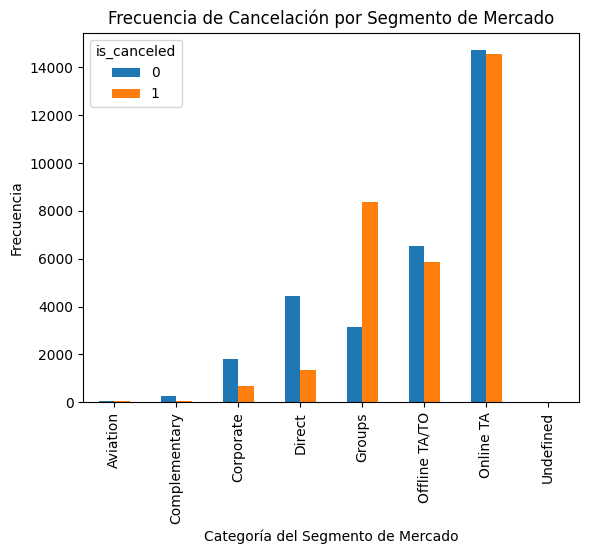

In [72]:
market_segments_cancelled = ds_trabajo.groupby(['market_segment', 'is_canceled']).size().unstack()

market_segments_cancelled.plot.bar()
plt.title('Frecuencia de Cancelación por Segmento de Mercado')
plt.xlabel('Categoría del Segmento de Mercado')
plt.ylabel('Frecuencia')
plt.show()

Para `reserved_room_type`, observamos que hay mayor concentración de reservas en el tipo de cuarto `A`.

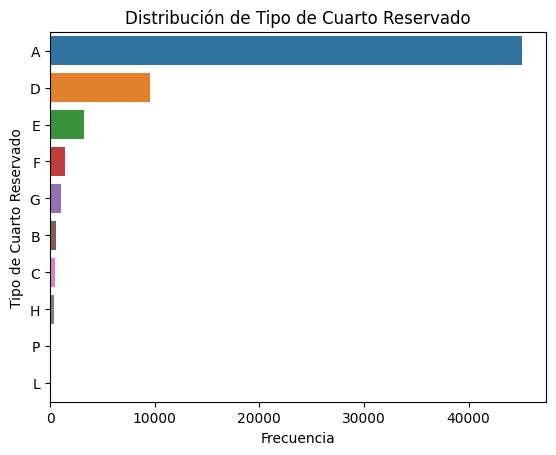

In [73]:
reserved_room_type_counts = ds_trabajo['reserved_room_type'].value_counts().reset_index()
reserved_room_type_counts.columns = ['reserved_room_type', 'count']

reserved_room_type_counts = reserved_room_type_counts.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='reserved_room_type', data=reserved_room_type_counts)

plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Cuarto Reservado')
plt.title('Distribución de Tipo de Cuarto Reservado')

plt.show()

Al analizarlo junto a `is_canceled`, el tipo de cuarto no parece tener un impacto significativo en la cancelación de la reserva.

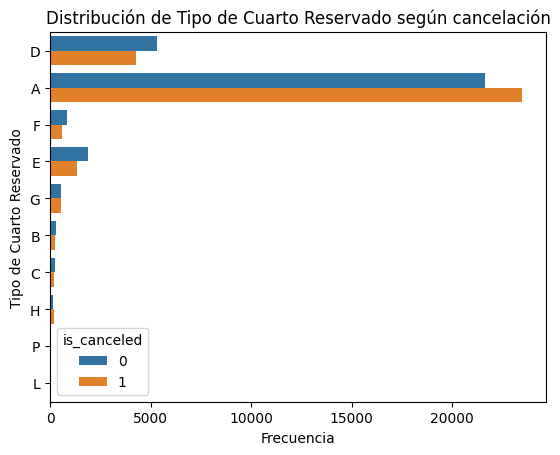

In [74]:
sns.countplot(y='reserved_room_type', hue="is_canceled",data=ds_trabajo)

plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Cuarto Reservado')
plt.title('Distribución de Tipo de Cuarto Reservado según cancelación')

plt.show()

En cuanto a `assigned_room_type`, el tipo más asignado es el `A`, lo cual podría corresponderse con la variable anteriormente analizada, son dos variables que nos va a interesar analizar juntas.

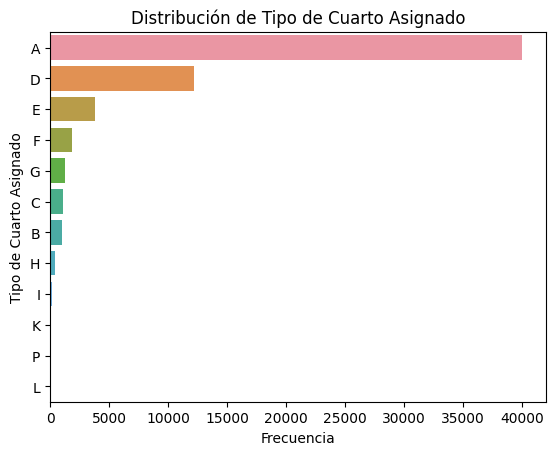

In [75]:
assigned_room_type_counts = ds_trabajo['assigned_room_type'].value_counts().reset_index()
assigned_room_type_counts.columns = ['assigned_room_type', 'count']

assigned_room_type_counts = assigned_room_type_counts.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='assigned_room_type', data=assigned_room_type_counts)

plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Cuarto Asignado')
plt.title('Distribución de Tipo de Cuarto Asignado')

plt.show()

Comparandolo con `is_canceled`, podemos decir que en general no afecta el estado de cancelación, sin embargo para el tipo más asignado hay más cancelaciones que no cancelaciones.

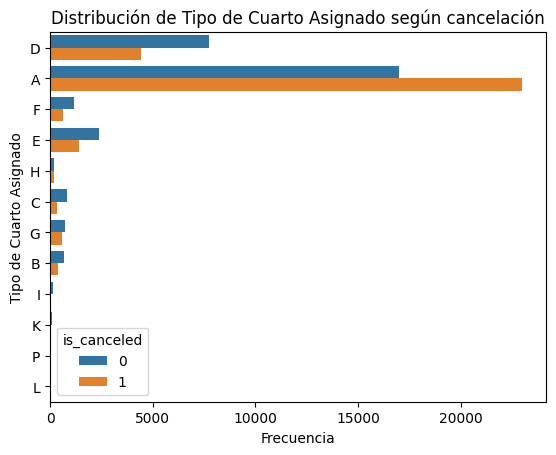

In [76]:
sns.countplot(y='assigned_room_type', hue="is_canceled",data=ds_trabajo)

plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Cuarto Asignado')
plt.title('Distribución de Tipo de Cuarto Asignado según cancelación')

plt.show()

Para `booking_changes`, observamos que la gran parte de las reservas no tuvieron cambios.

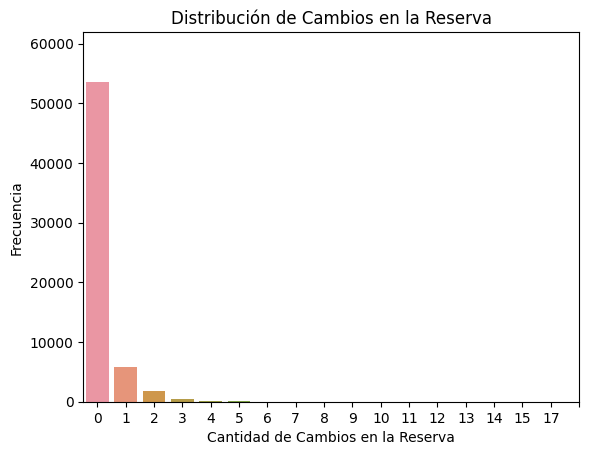

In [77]:
sns.countplot(x='booking_changes', data=ds_trabajo)

plt.xlabel('Cantidad de Cambios en la Reserva')
plt.ylabel('Frecuencia')
plt.ylim(0, len(ds_trabajo) + 1)
plt.xticks(range(0, max(ds_trabajo['booking_changes']) + 1, 1))
plt.title('Distribución de Cambios en la Reserva')

plt.show()

Cuando lo analizamos junto a `is_canceled`, observamos que no hay gran diferencia entre el estado de la cancelación ya que la mediana es 0 en ambos estados, aún así hay algunos outliers más que no cancelan en relación a los cambios en la reserva.

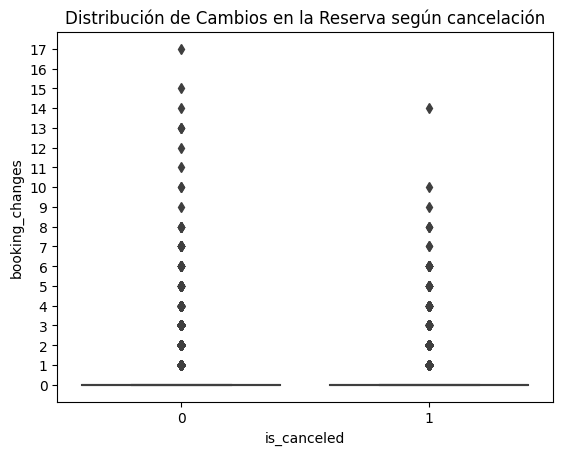

In [78]:
sns.boxplot(x='is_canceled', y='booking_changes', data=ds_trabajo)
plt.title('Distribución de Cambios en la Reserva según cancelación')
plt.yticks(range(0, max(ds_trabajo['booking_changes']) + 1, 1))
plt.show()

Para el análisis de `days_in_waiting_list`, notamos que hay una gran concentración de datos en 0 días.

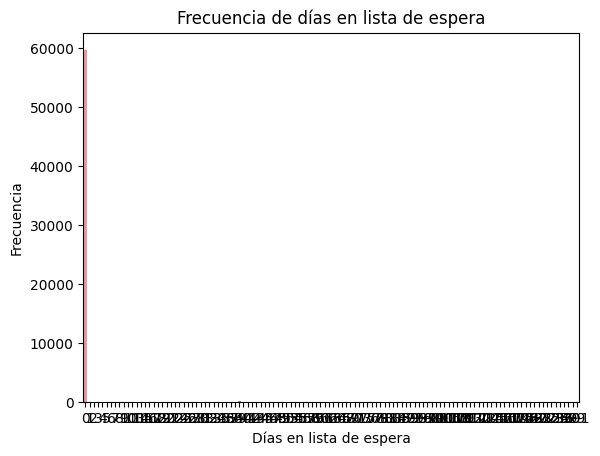

In [79]:
import seaborn as sns

sns.countplot(x='days_in_waiting_list', data=ds_trabajo)

plt.xlabel('Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de días en lista de espera')

plt.show()


Vamos a analizar por separado aquellos registros que tengan más de 0 días en lista de espera.

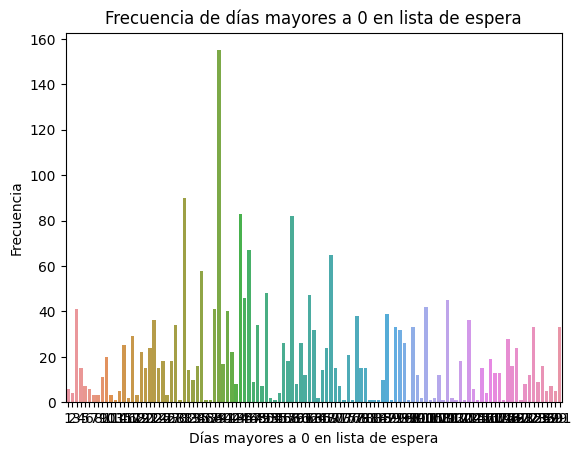

In [80]:
import seaborn as sns

days_greater_zero = ds_trabajo[ds_trabajo['days_in_waiting_list'] > 0]

sns.countplot(x='days_in_waiting_list', data=days_greater_zero)

plt.xlabel('Días mayores a 0 en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de días mayores a 0 en lista de espera')

plt.show()


Como todavía es ilegible, vamos a pasar estos registros con más de 0 días de espera a quincenas.

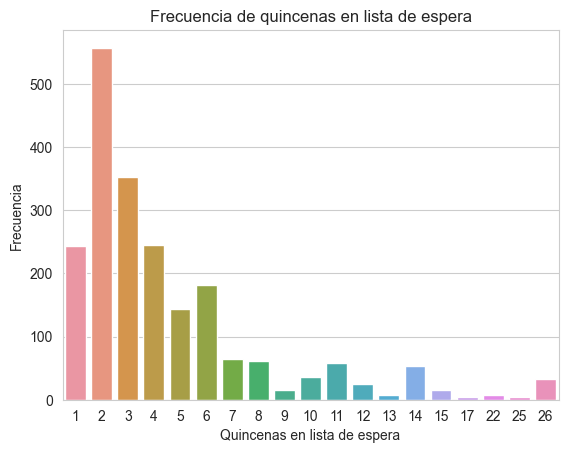

In [81]:
import seaborn as sns

ds_trabajo['fortnights_in_waiting_list'] = ds_trabajo['days_in_waiting_list'] // 15

fortnights_in_waiting_list = ds_trabajo.loc[ds_trabajo['fortnights_in_waiting_list'] > 0]

sns.set_style('whitegrid')

sns.countplot(x='fortnights_in_waiting_list', data=fortnights_in_waiting_list)

plt.xlabel('Quincenas en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de quincenas en lista de espera')

# Mostrar el gráfico
plt.show()


Ahora sí notamos que hay una mayor concentración de datos en la segunda quincena. Ahora vamos a analizar esta variable contra `is_canceled`, tanto en el caso de 0 días como de más de 0 días agrupados en quincenas. 

Para el caso de 0 días en lista de espera, vemos que no hay gran diferencia entre cancelados y no cancelados, por lo que no parece tener un impacto significativo en el análisis del target.

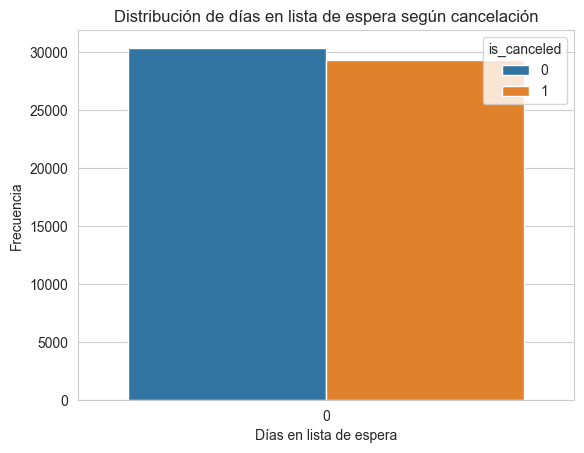

In [82]:
sns.set_style('whitegrid')
zero_days = ds_trabajo[ds_trabajo['days_in_waiting_list'] == 0]
sns.countplot(x='days_in_waiting_list', hue="is_canceled",data=zero_days)

plt.xlabel('Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de días en lista de espera según cancelación')

plt.show()

Ahora bien, cuando lo analizamos para las quincenas de registros mayores a 0 días en lista de espera, notamos que sí hay distintos pesos para cancelado o no cancelado según la quincena.

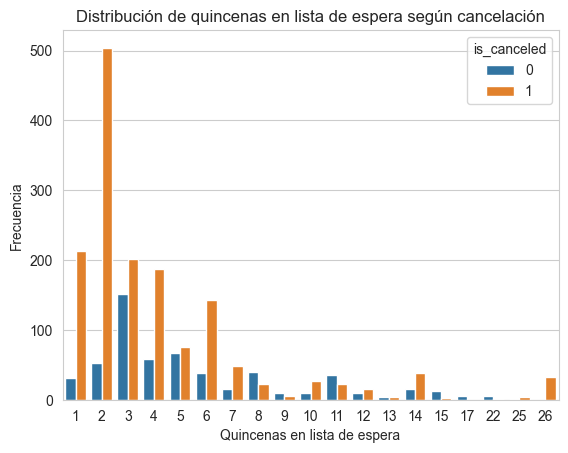

In [83]:
fortnights_in_waiting_list = ds_trabajo.loc[ds_trabajo['fortnights_in_waiting_list'] > 0]

sns.set_style('whitegrid')

sns.countplot(x='fortnights_in_waiting_list', hue="is_canceled",data=fortnights_in_waiting_list)

plt.xlabel('Quincenas en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de quincenas en lista de espera según cancelación')

plt.show()

En resumen, lo que notamos es que, con unidad de dias, es muy dificil analizar esta columna debido a que son muchos los valores posibles. Se nos ocurrió entonces pasar a quincenas aquellos registros que tengan dias mayores a 0 y observar acá su relacion con is_canceled. En principio, para los registros que tienen 0 días no vemos que tenga impacto significativo contra el target porque la cantidad de cancelados y no cancelados es muy similar. En cambio para las reservas de más de 0 días, agrupadas por quincena, si vemos diferencias entre los valores. Pero también sabemos que son muy pocos los registros que caen en esta categoría en comparación a aquellos que tienen 0 días de espera (alrededor de 500 registros de los 60k disponibles). Por este motivo, optamos por reemplazar la columna numérica `days_in_waiting_list` por una categórica `more_than_zero_days_in_waiting_list`, que valdrá 0 para aquellos registros que tienen 0 días en lista de espera, y 1 en caso contrario.

In [84]:
ds_trabajo['more_than_zero_days_in_waiting_list'] = ds_trabajo['days_in_waiting_list'].apply(lambda x: 0 if x == 0 else 1)
ds_trabajo.drop('days_in_waiting_list', axis=1, inplace=True)
ds_trabajo.drop('fortnights_in_waiting_list', axis=1, inplace=True)

Ahora analizando la relación de `more_than_zero_days_in_waiting_list` y de `is_canceled`, vemos que no influye mucho en las cancelaciones cuando hay 0 días en lista de espera, mientras que se ve que hay una frecuencia mayor de cancelaciones cuando son más de 0 días.

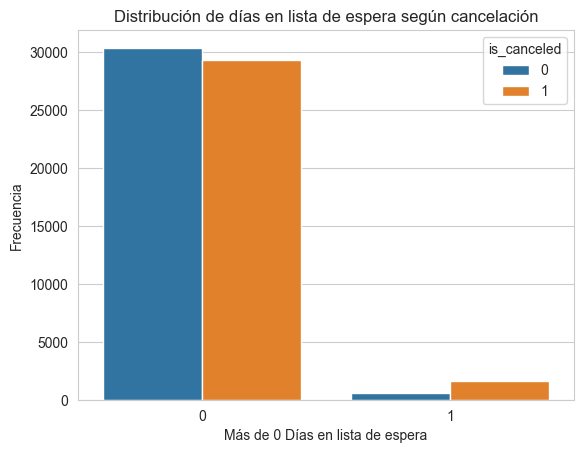

In [85]:
sns.countplot(x='more_than_zero_days_in_waiting_list', hue="is_canceled",data=ds_trabajo)

plt.xlabel('Más de 0 Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de días en lista de espera según cancelación')

plt.show()

Analizamos la distribución de la columna `deposit_type`. Como pudimos ver antes, la categoría Refundable presenta únicamente 78 registros. Podríamos descartarla, pero antes vamos a analizar la correlación con el target.


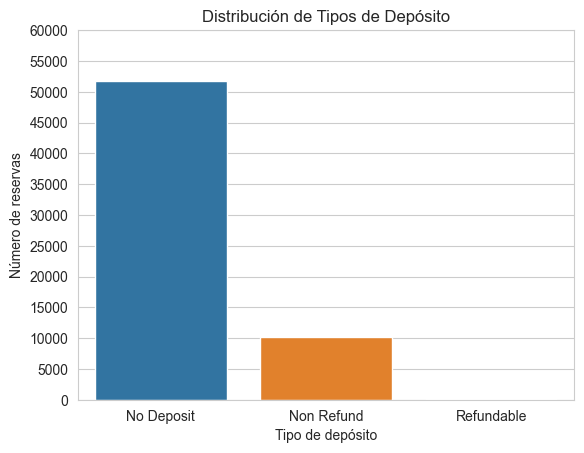

In [86]:
sns.countplot(x="deposit_type", data=ds_trabajo)

# para agregar etiquetas a los ejes y título al gráfico
plt.xlabel("Tipo de depósito")
plt.ylabel("Número de reservas")
plt.title("Distribución de Tipos de Depósito")

plt.yticks(range(0, 61913, 5000))

plt.show()

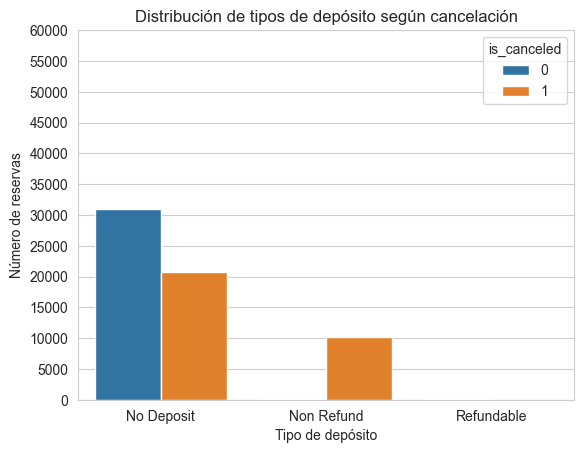

In [87]:
sns.countplot(x="deposit_type", hue="is_canceled", data=ds_trabajo)

plt.xlabel("Tipo de depósito")
plt.ylabel("Número de reservas")
plt.title("Distribución de tipos de depósito según cancelación")

plt.yticks(range(0, 61913, 5000))


plt.show()

De las reservas con tipo de depósito Non Refund, en su gran mayoría son canceladas.

Por otro lado, observamos que no hay reservas con la categoría Refundable, por lo que vamos a descartarla. Las reservas que apuntan a esta categoría vamos a cambiarlas por No Deposit. Esto es porque su distribución respecto a la cancelación son similares.

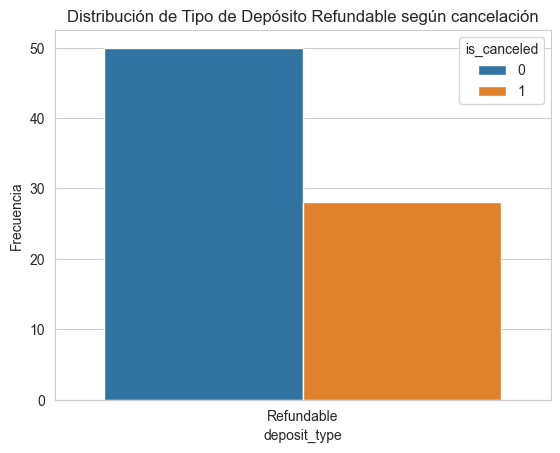

In [88]:
ds_deposit_type_refundable = ds_trabajo.loc[ds_trabajo['deposit_type'] == "Refundable"]

grafico = sns.countplot(x='deposit_type', hue='is_canceled', data=ds_deposit_type_refundable)

plt.ylabel('Frecuencia')
plt.title("Distribución de Tipo de Depósito Refundable según cancelación")

plt.show()

In [89]:
ds_trabajo['deposit_type'] = ds_trabajo['deposit_type'].replace('Refundable', 'No Deposit')
ds_trabajo['deposit_type'].value_counts()

deposit_type
No Deposit    51763
Non Refund    10150
Name: count, dtype: int64

Analizamos la columna `customer_type`. Notamos que en su mayoría las reservas fueron hechas por clientes de tipo Transient. Además, son muy pocos las reservas de clientes de tipo Contract y Group (representan poco más del 3% y menos del 1% respectivamente). Vamos a ver además que su distribución respecto a la cancelación son similares, por lo que unificaremos los registros que apuntan a Group con los de Contract.


customer_type
Transient          76.638186
Transient-Party    19.653385
Contract            3.283640
Group               0.424790
Name: count, dtype: float64


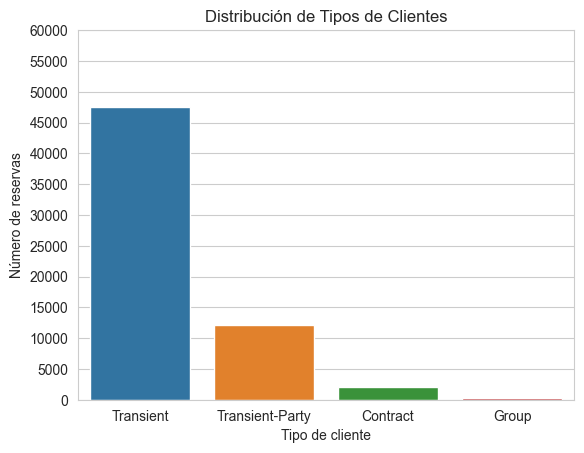

In [90]:
counts = ds_trabajo["customer_type"].value_counts()
percentages = counts / len(ds_trabajo) * 100

# para imprimir los porcentajes
print(percentages)

sns.countplot(x="customer_type", data=ds_trabajo)

plt.xlabel("Tipo de cliente")
plt.ylabel("Número de reservas")
plt.title("Distribución de Tipos de Clientes")

plt.yticks(range(0, 61913, 5000))

plt.show()

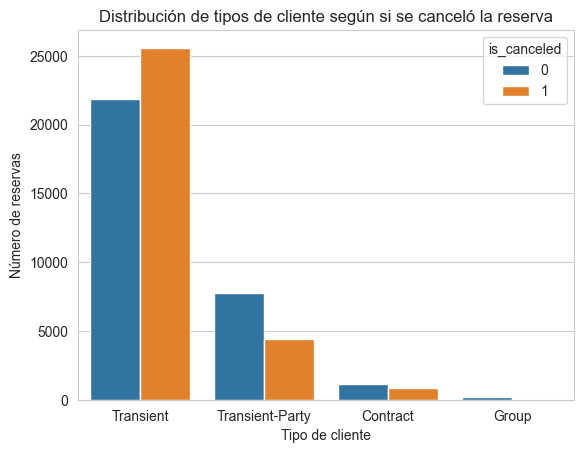

In [91]:
sns.countplot(x="customer_type", hue="is_canceled", data=ds_trabajo)

# para agregar etiquetas a los ejes y título al gráfico
plt.xlabel("Tipo de cliente")
plt.ylabel("Número de reservas")
plt.title("Distribución de tipos de cliente según si se canceló la reserva")

plt.show()

In [92]:
ds_trabajo['customer_type'] = ds_trabajo['customer_type'].replace('Group', 'Contract')
ds_trabajo['customer_type'].value_counts()

customer_type
Transient          47449
Transient-Party    12168
Contract            2296
Name: count, dtype: int64

Para la columna `adr`, si vemos su rango intercuartílico, vemos que sus valores está en su mayoría entre 70 y 126, y el máximo (no atípico), está apenas por encima de 200. Por otro lado vemos que hay muchos outliers, lo que nos da la pauta de que hay una variabilidad en los precios de las reservas.
Por último vamos a analizar más en profundidad el mínimo.

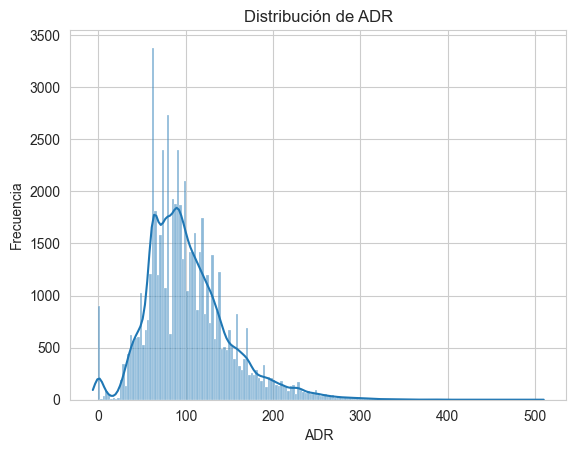

In [93]:
sns.histplot(data=ds_trabajo, x="adr", kde=True)

# para agregar etiquetas a los ejes y título al gráfico
plt.xlabel("ADR")
plt.ylabel("Frecuencia")
plt.title("Distribución de ADR")

plt.show()

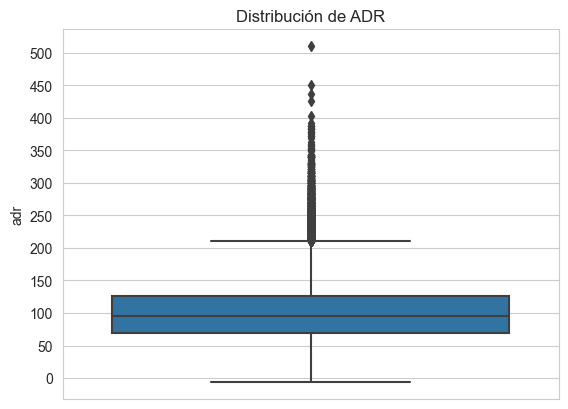

In [94]:
sns.boxplot(y="adr", data=ds_trabajo)

# para agregar título al gráfico
plt.title("Distribución de ADR")
plt.yticks(range(0,511,50))
plt.show()

Si analizamos la relación de `adr` cuando éste vale 0 (o menos) con el tipo de depósito, observamos que todos ellos tienen como tipo de depósito No Deposit. Esto tiene sentido ya que el paper indica que `adr` es un cálculo que se realiza dividiendo la suma de las transacciones por la cantidad total de noches. Por lo tanto, vamos a considerarlo como un dato válido.
En cuanto a los valores menores a 0, que en este caso es un solo registro, vamos a considerarlo como inválido ya que se trata de un promedio y el mismo pudo haber sido mal calculado o cargado. Por lo tanto, vamos a cambiarlo a 0.

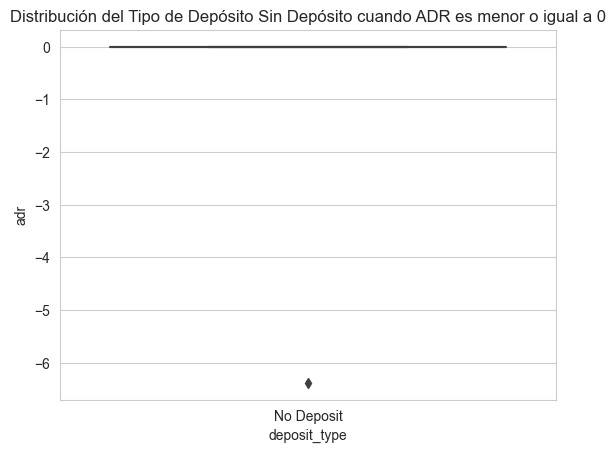

In [95]:
filtered_df = ds_trabajo[(ds_trabajo['adr'] <= 0) & (ds_trabajo['deposit_type'] == 'No Deposit')]

sns.boxplot(data=filtered_df, x='deposit_type', y='adr')
plt.title("Distribución del Tipo de Depósito Sin Depósito cuando ADR es menor o igual a 0")

plt.show()

In [96]:
ds_trabajo.loc[ds_trabajo['adr'] < 0, 'adr'] = 0
ds_trabajo.loc[ds_trabajo['adr'] < 0, 'adr'].sum()

0.0

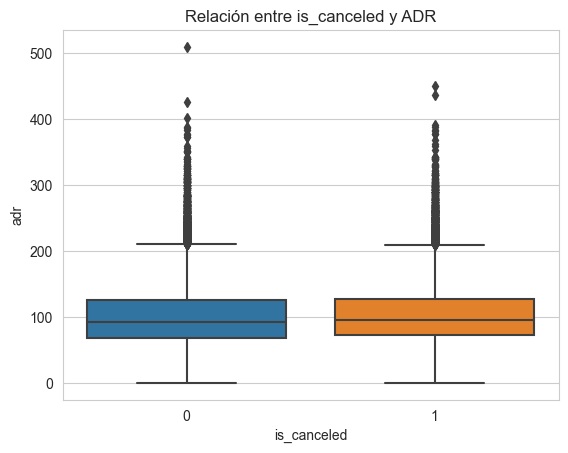

In [97]:
sns.boxplot(x="is_canceled", y="adr", data=ds_trabajo)

plt.title("Relación entre is_canceled y ADR")

plt.show()

Los boxplots de `adr` para cada valor de `is_canceled` se ven muy similares o prácticamente idénticos, lo que nos indica que no hay una relación significativa entre las variables. En este caso, es posible que la variable `adr` no tenga una influencia importante en la decisión de cancelar o no una reserva.

Para `arrival_date`, podemos ver que hay una variación amplia entre distintos rangos de fechas. En particular, podemos notar que suele haber picos de llegadas en los distintos años en los segmentos de abril, julio y octubre.

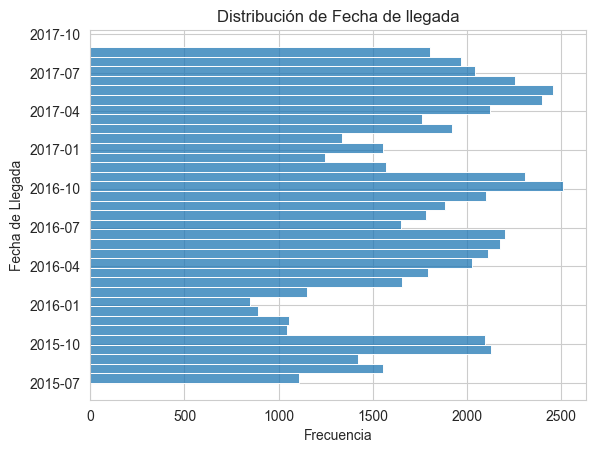

In [98]:
ds_trabajo['arrival_date'] = pd.to_datetime(ds_trabajo['arrival_date'])

sns.histplot(data=ds_trabajo, y='arrival_date', bins=35)
plt.xlabel('Frecuencia')
plt.ylabel('Fecha de Llegada')
plt.title('Distribución de Fecha de llegada')
plt.show()

Cuando vemos su relación con `is_canceled`, podemos decir que en general la proporción de cancelados y no cancelados es muy similar.

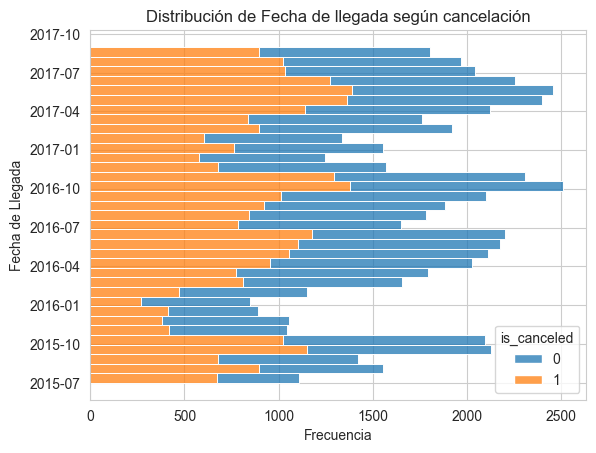

In [99]:
arrival_canceled = ds_trabajo[['arrival_date', 'is_canceled']]

arrival_canceled = arrival_canceled.groupby(['arrival_date', 'is_canceled']).size().reset_index(name='counts')
plt.xlabel('Frecuencia')
plt.ylabel('Fecha de Llegada')
plt.title('Distribución de Fecha de llegada según cancelación')
sns.histplot(y='arrival_date', weights='counts', hue='is_canceled', multiple='stack', data=arrival_canceled, bins=35)
plt.show()

Analizando `agent_specified`, la amplia mayoría de agentes están especificados en las reservas.

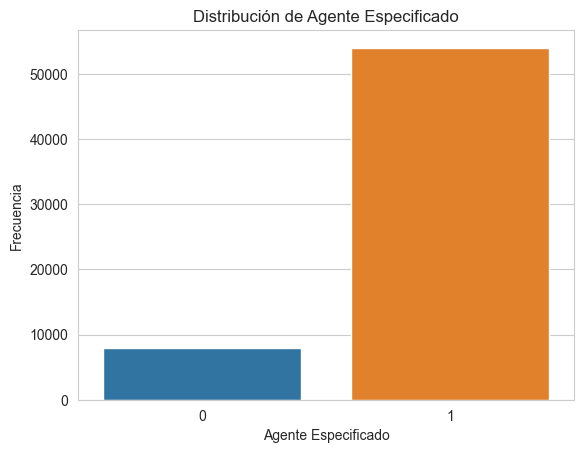

In [100]:
sns.countplot(x='agent_specified', data=ds_trabajo)

plt.xlabel('Agente Especificado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Agente Especificado')

plt.show()


Analizándola en conjunto con `is_canceled`, podemos notar que hay un poco más de cancelaciones cuando se especifica agente, y un poco menos cuando no.

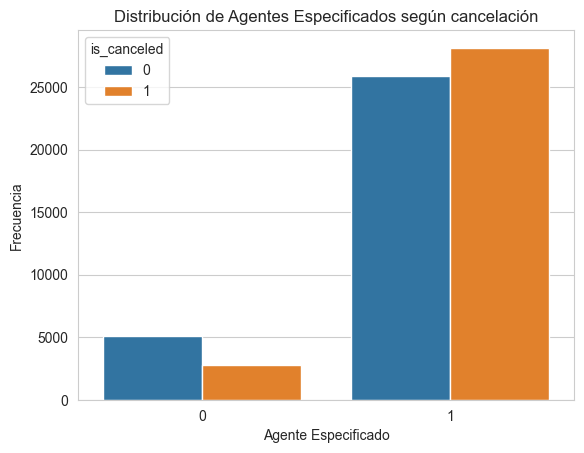

In [101]:
sns.countplot(x="agent_specified", hue="is_canceled", data=ds_trabajo)

plt.xlabel("Agente Especificado")
plt.ylabel("Frecuencia")
plt.title("Distribución de Agentes Especificados según cancelación")

plt.show()

En cuanto a `total_guests`, vemos que generalmente son 2 huéspedes por reserva. También notamos que hay registros con 0 huéspedes, lo cual vamos a considerar que son outliers y los vamos a reemplazar por 1. 

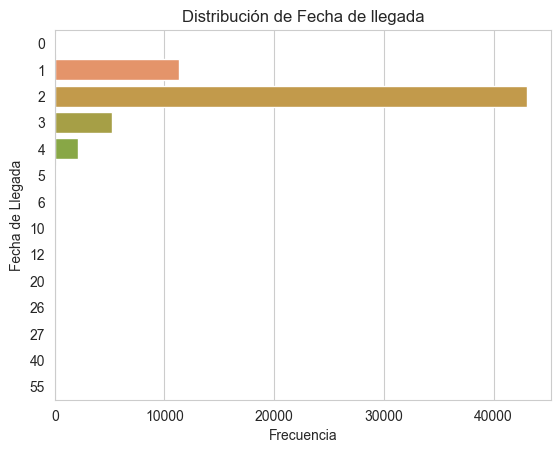

In [102]:
sns.countplot(data=ds_trabajo, y='total_guests')
plt.xlabel('Frecuencia')
plt.ylabel('Fecha de Llegada')
plt.title('Distribución de Fecha de llegada')
plt.show()


In [103]:
print("Cantidad de registros con 0 huéspedes:", ds_trabajo['total_guests'].value_counts()[0])

Cantidad de registros con 0 huéspedes: 76


In [104]:
ds_trabajo.loc[ds_trabajo['total_guests'] == 0, 'total_guests'] = 1
ds_trabajo.loc[ds_trabajo['total_guests'] == 0, 'total_guests'].sum()

0

Al analizarla junto con `is_canceled`, vemos que la mayor frecuencia de cancelaciones es cuando el total de huéspedes es 2. Notamos una tendencia, entre más cantidad de huéspedes, más se cancela.

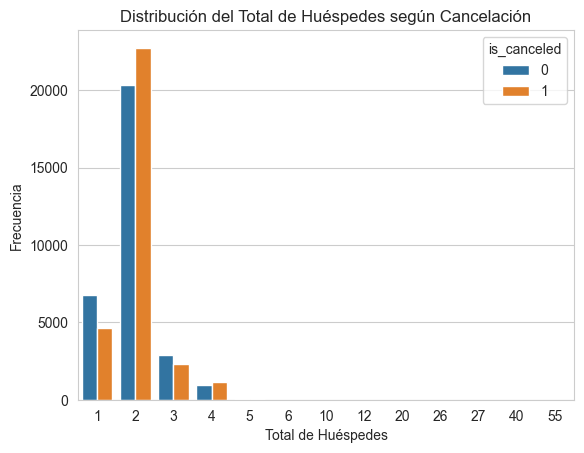

In [105]:
sns.countplot(x="total_guests", hue="is_canceled", data=ds_trabajo)

plt.xlabel('Total de Huéspedes')
plt.ylabel('Frecuencia')
plt.title('Distribución del Total de Huéspedes según Cancelación')

plt.show()

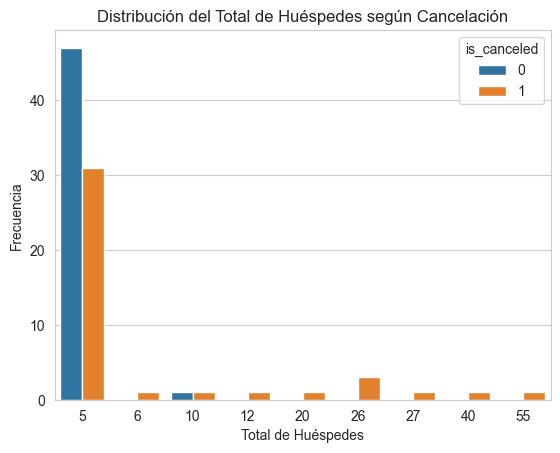

In [106]:
total_guests = ds_trabajo.loc[ds_trabajo['total_guests'] >= 5]

sns.countplot(x='total_guests', data=total_guests, hue="is_canceled")

plt.xlabel('Total de Huéspedes')
plt.ylabel('Frecuencia')
plt.title('Distribución del Total de Huéspedes según Cancelación')

# Mostrar el gráfico
plt.show()

Analizamos la variable `total_of_special_requests` y observamos que más de la mitad de los registros no cuenta con peticiones especiales. Luego a medida que aumentan las peticiones especiales, son menos los registros que tienen ese número.


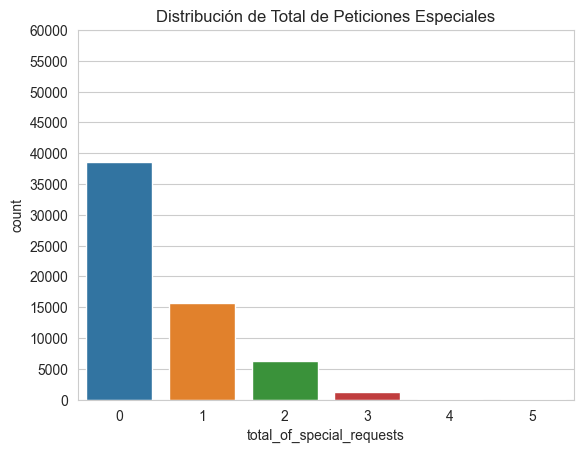

In [107]:
sns.countplot(data=ds_trabajo, x="total_of_special_requests")

plt.title("Distribución de Total de Peticiones Especiales")

plt.yticks(range(0, 61913, 5000))

plt.show()

Si visualizamos la relación de esta variable con el target, podemos apreciar que las reservas sin peticiones especiales tienen mayor frecuencia de cancelación que las que cuentan con peticiones especiales.


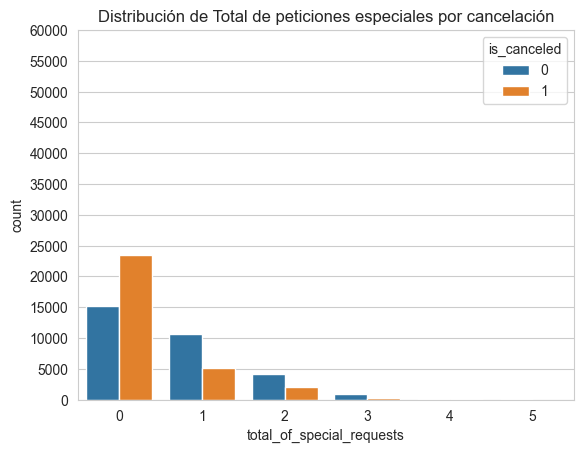

In [108]:
# agrupamos el dataframe por "total_of_special_requests" y "is_canceled", y contamos el número de reservas en cada grupo
counts = ds_trabajo.groupby(["total_of_special_requests", "is_canceled"]).size().reset_index(name="count")

# creamos el gráfico de barras apiladas
sns.barplot(data=counts, x="total_of_special_requests", y="count", hue="is_canceled")

plt.title("Distribución de Total de peticiones especiales por cancelación")

plt.yticks(range(0, 61913, 5000))


plt.show()

Analizamos la distribución de la columna `reservation_status_date`. Hay una amplia variación entre distintos rangos de fecha. Vemos que hay picos de cambios en el estado de las reservas entre septiembre de 2015 y enero de 2016, hasta mayo del mismo año. Y un pico importante a principios de 2017.


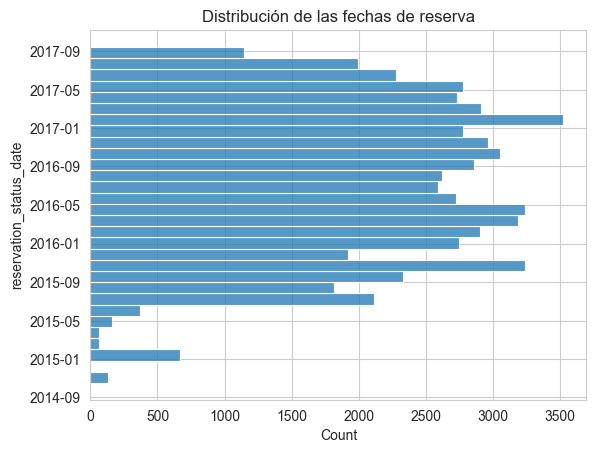

In [109]:
sns.histplot(data=ds_trabajo, y="reservation_status_date", bins=30)

plt.title("Distribución de las fechas de reserva")


plt.show()

Analizando la relación con el target, se ve a simple vista que en los picos mencionados hubo mayor cancelación que check-out. Y desde septiembre del 2014 hasta poco más de mitad de año del 2015, principalmente fueron cancelaciones.


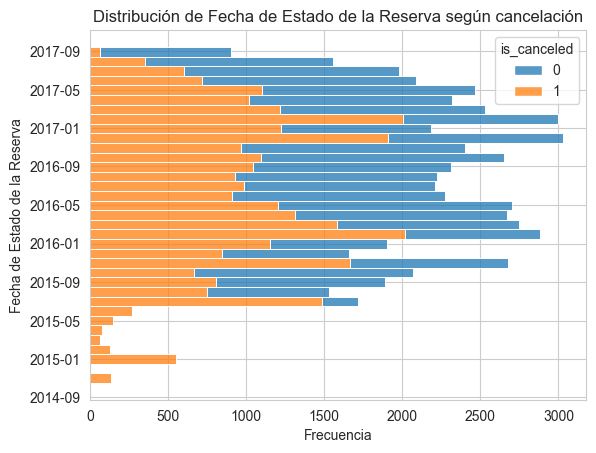

In [110]:
reservation_status_canceled = ds_trabajo[['reservation_status_date', 'is_canceled']]

reservation_status_canceled = reservation_status_canceled.groupby(['reservation_status_date', 'is_canceled']).size().reset_index(name='counts')

plt.xlabel('Frecuencia')

plt.ylabel('Fecha de Estado de la Reserva')

plt.title('Distribución de Fecha de Estado de la Reserva según cancelación')

sns.histplot(y='reservation_status_date', weights='counts', hue='is_canceled', multiple='stack', data=reservation_status_canceled, bins=35)

plt.show()

En cuanto a la columna target (`is_canceled`), podemos ver que básicamente hay tantas reservas canceladas como no.

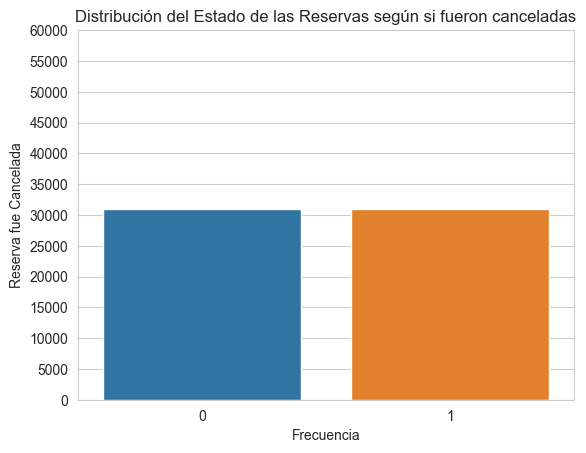

In [111]:
sns.countplot(x='is_canceled', data=ds_trabajo)

plt.xlabel('Frecuencia')

plt.ylabel('Reserva fue Cancelada')

plt.title('Distribución del Estado de las Reservas según si fueron canceladas')

plt.yticks(range(0, 61913, 5000))
plt.show()

Vamos a analizar mediante un heatmap las correlaciones lineales entre todas las variables cuantitativas de nuestro dataset, y a partir de ella vamos a tomar los puntos más fuertes para ver su correlación en un gráfico.

<Axes: >

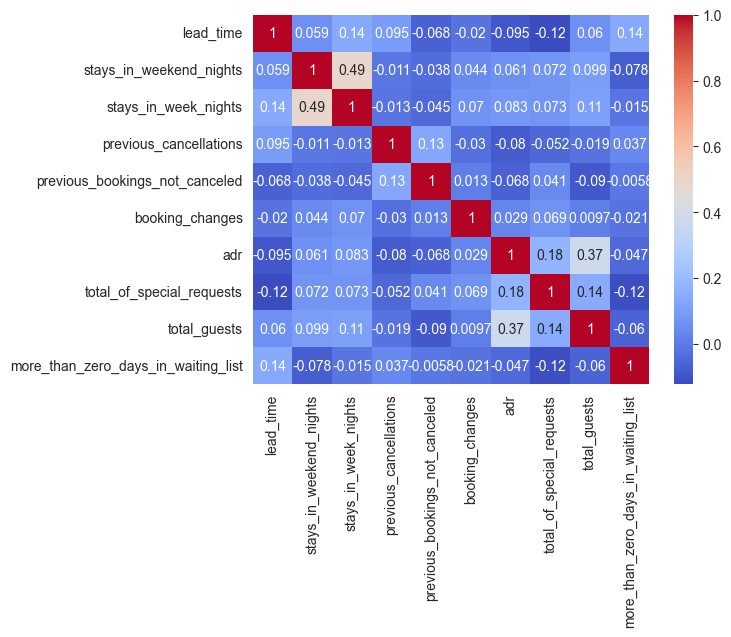

In [112]:
num_vars = ds_trabajo.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_vars.corr(), annot=True, cmap='coolwarm')



Vemos que no hay correlaciones lineales fuertes. Vamos a tomar aquellas de correlación lineal moderada. En primer lugar, tomamos `stays_in_week_nights` y `stays_in_weekend_nights` con correlación 0.49, que es la correlación más fuerte entre todas. Luego tomaremos `total_guests` y `adr`, con correlación de 0.37.

En el caso de `stays_in_week_nights` y `stays_in_weekend_nights`, vemos en el gráfico que hay una correlación positiva hasta alrededor de las 20 noches de día de semana, luego de esto vemos que se empiezan a dispersar hasta llegar a ser outliers. Esto es, hay una tendencia general de aumento en los valores de ambas variables, pero hay ciertos puntos que se alejan de la línea de tendencia y no siguen esta relación. 

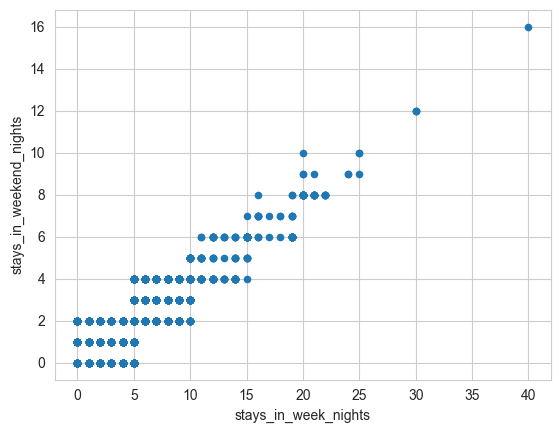

In [113]:
ds_trabajo.plot.scatter(x="stays_in_week_nights", y="stays_in_weekend_nights")
plt.show()

Con respecto a `total_guests` y `adr`, las observaciones van agrupandose de manera horizonal. Podemos decir que hay una correlación lineal débil entre ellas. Decimos entonces que la variación en una variable no está relacionada con la variación en la otra.

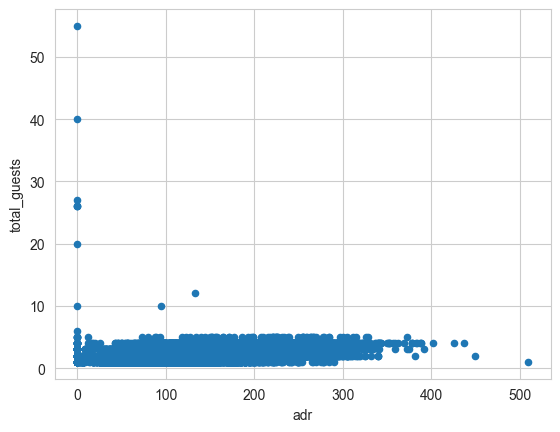

In [114]:
ds_trabajo.plot.scatter(x="adr", y="total_guests")
plt.show()

Ahora vamos a analizar la relación entre variables categóricas que consideramos que tienen una correlación fuerte entre ellas. Para el cálculo de la correlación, vamos a usar Cramer y vamos a visualizar la matriz de frecuencia mediante un heatmap.

En primer lugar, nos interesa conocer la relación entre `market_segment` y `distribution_channel`. Esta relación la analizamos previamente cuando quisimos simplificar la columna `agent`, por lo que confirmamos que hay una correlación fuerte al ver un coeficiente de Cramer de 0.7. 

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ds_trabajo['market_segment'], ds_trabajo['distribution_channel'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
print(cramer_v)

0.7050383989053967


Otro par de variables categóricas que nos interesa analizar es `market_segment` y `deposit_type`. Observamos que el coeficiente de Cramer es 0.58, hay una relación fuerte. Analizando el heatmap, vemos que en particular una gran cantidad de reservas para las que no hubo pago cuando el segmento de mercado es TA/TO, tanto Online como Offline. En cuanto a las reservas que se pagaron en su totalidad, la cantidad es mucho menor y se ve que hay más ocurrencias para el segmento de mercado Groups.

In [116]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ds_trabajo['market_segment'], ds_trabajo['deposit_type'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
print(cramer_v)

0.5783344134469628


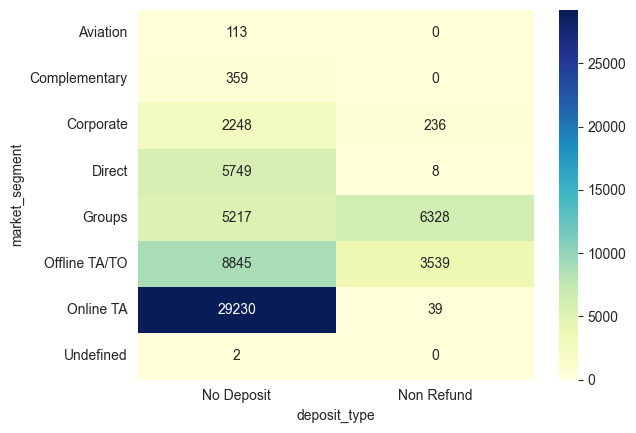

In [117]:
tabla_contingencia = pd.crosstab(ds_trabajo["market_segment"], ds_trabajo["deposit_type"])
sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="g")
plt.show()

El par `market_segment` y `agent_specified` es otro que analizamos anteriormente, ya habíamos notado una relación entre ellas. Lo confirmamos viendo que el coeficiente de Cramer es 0.65.

In [118]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ds_trabajo['market_segment'], ds_trabajo['agent_specified'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
print(cramer_v)

0.6475327377388427


Análogo al caso anterior, también habíamos analizado el caso `agent_specified` y `distribution_channel`, vemos que el coeficiente de Cramer es 0.65, similar al anterior.

In [119]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ds_trabajo['distribution_channel'], ds_trabajo['agent_specified'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
print(cramer_v)

0.6533820484035889


Por último, creemos que `reserved_room_type` y `assigned_room_type` tienen una correlación muy fuerte, en particular, la más alta entre las variables categóricas. El coeficiente de Cramer es 0.85. Particularmente, vemos en el heatmap que la mayor cantidad de coincidencias para el cuarto asignado y reservado es en el tipo `A`, seguido del `D` en menor medida.

In [120]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ds_trabajo['reserved_room_type'], ds_trabajo['assigned_room_type'])
chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
print(cramer_v)

0.8514890340341219


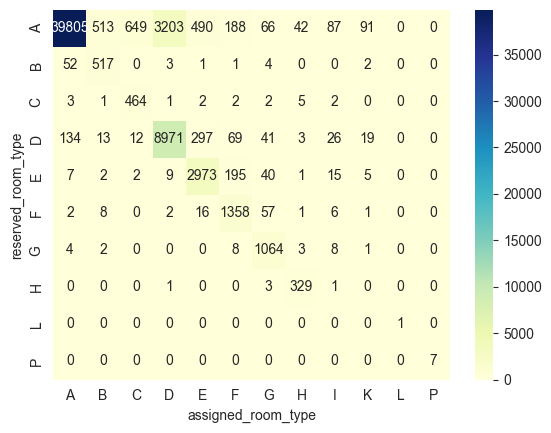

In [121]:
tabla_contingencia = pd.crosstab(ds_trabajo["reserved_room_type"], ds_trabajo["assigned_room_type"])
sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="g")
plt.show()

Guardo el dataset en otro mas reducido para mejorar el manejo de los archivos.

In [122]:
ds_trabajo.to_csv('hotels_train_filtrado.csv', index=False)